In [1]:
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
import itertools
from math import pi

In [2]:
# create instance of the class "Class"
LambdaCDM1 = Class()
# pass input parameters
LambdaCDM1.set({'omega_b':0.022032,'omega_cdm':0.12010,'h':0.6732117,'A_s': 2.100549e-09,'n_s':0.9660499,'tau_reio':0.0543})
LambdaCDM1.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
# run class
LambdaCDM1.compute()
kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
Pk1 = [] # P(k) in (Mpc/h)**3
h1 = LambdaCDM1.h() # get reduced Hubble for conversions to 1/Mpc
for k in kk:
    Pk1.append(LambdaCDM1.pk(k*h1,0.)*h1**3) # function .pk(k,z)

cls_lcdm = LambdaCDM1.lensed_cl(2500)
ll_lcdm = cls_lcdm['ell'][2:]
clTT_lcdm = cls_lcdm['tt'][2:]
clEE_lcdm = cls_lcdm['ee'][2:]
clPP_lcdm = cls_lcdm['pp'][2:]
LambdaCDM1.struct_cleanup()

In [3]:
# Definir parámetros cosmológicos comunes
k_out = [0.1]  # unidades de 1/Mpc

In [4]:
#x0=0.001,V0=1, lambda=0.001 no funciona
#x0=0.001,V0=10.0, lambda=0.01 no funciona
#x0=0.001,V0=10.0, lambda=0.015 no funciona

In [5]:
common_settings0 = {
    'output': 'mPk,tCl,pCl,lCl',
    'P_k_max_1/Mpc': 3.0,
    'k_output_values': str(k_out).strip('[]'),
    'h': 0.6732117,
    'Omega_fld': 0,
    'Omega_smg': -1,
    'Omega_Lambda': 0.69,
    'omega_b': 0.022032,
    'Omega_cdm': 0,
    'gravity_model': 'quintessence_monomial',
    'theta_schm': 2.7e-19,
    'DM_schm': 0.26,
    'h_schm': 1,
    'A_s': 2.100549e-09,
    'n_s': 0.9660499,
    'tau_reio': 0.05430842,
    'compute damping scale': 'yes',
    'lensing':'yes'
}

# Lista de valores para x0_schm, V0_schm y lambda_schm
x_variable0 = [1e-3]
V0_variable0 = [1, 1e1, 1.5e1]
lambda_variable0 = [0.1, 0.15, 0.17, 100]  # Lista de valores para lambda_schm (0.2)

# Generar todas las combinaciones de x0_schm, V0_schm y lambda_schm
combinations0 = list(itertools.product(x_variable0, V0_variable0, lambda_variable0))

# Background
z_all0 = []
a_all0 = []
Omega_rad_all0 = []
Omega_bar_all0 = []
Omega_lambda_all0 = []
Omega_sch_all0 = []
w_sch_all0 = []
rho_rel_all0 = []
integral_all0 = []

# Listas para perturbaciones lineales
clTT_all0 = []
clEE_all0 = []
clPP_all0 = []
Pk_all0 = []
ll_all0 = []

# Ciclo para iterar sobre las combinaciones de x0_schm, V0_schm y lambda_schm
for x, V0, lam in combinations0:
    common_settings0['x0_schm'] = x        # Actualizar el valor de x0_schm
    common_settings0['V0_schm'] = V0       # Actualizar el valor de V0_schm
    common_settings0['lambda_schm'] = lam  # Actualizar el valor de lambda_schm
    
    print(f"iniciando cálculos con la combinación: x0={x},V0={V0}, lambda={lam}")
    
    
    # Crear una nueva instancia de Class y configurar
    cosmo = Class()
    cosmo.set(common_settings0)
    cosmo.compute()
    
    # Obtener el background
    background = cosmo.get_background()

    # Extraer las cantidades necesarias del background
    z = background['z']                    # Redshift
    a = 1 / (1 + z)                        # Factor de escala
    rho_gamma = background['(.)rho_g']     # Densidad de energía de fotones
    rho_nu = background['(.)rho_ur']       # Densidad de energía de neutrinos relativistas
    rad = rho_gamma + rho_nu               # Radiación total (fotones + neutrinos relativistas)
    bar = background['(.)rho_b']           # Densidad de energía bariónica
    lamb = background['(.)rho_lambda']     # Densidad de energía de la constante cosmológica
    rho_crit = background['(.)rho_crit']   # Densidad crítica
    rho_sch = background['(.)rho_smg']     # Densidad de energía del campo escalar (quintessencia)
    p_sch = background['(.)p_smg']         # Presión del campo escalar
    
    # Calcular las fracciones de densidad
    Omega_rad = rad / rho_crit
    Omega_bar = bar / rho_crit
    Omega_lambda = lamb / rho_crit
    Omega_sch = rho_sch / rho_crit
    
    # Calcular el parámetro de ecuación de estado w_sch
    #w_sch = (p_sch - lamb) / (rho_sch + lamb)
    w_sch = p_sch / rho_sch
    
    
    # Densidad relativista total
    rho_rel = rad + 3 * p_sch

    # Guardar los resultados en las listas correspondientes
    z_all0.append(z)
    a_all0.append(a)
    Omega_rad_all0.append(Omega_rad)
    Omega_bar_all0.append(Omega_bar)
    Omega_lambda_all0.append(Omega_lambda)
    Omega_sch_all0.append(Omega_sch)
    w_sch_all0.append(w_sch)
    rho_rel_all0.append(rho_rel)
    
    # Obtener los espectros angulares C_l
    cls = cosmo.lensed_cl(2500)  # Espectros angulares lensed hasta l=2500
    ll = cls['ell'][2:]  # Valores de l
    clTT = cls['tt'][2:]  # C_l^TT
    clEE = cls['ee'][2:]  # C_l^EE
    clPP = cls['pp'][2:]  # C_l^PP
    
    # Guardar C_l en las listas correspondientes
    clTT_all0.append(clTT)
    clEE_all0.append(clEE)
    clPP_all0.append(clPP)
    ll_all0.append(ll)

    # Obtener el espectro de potencia P(k)
    kk = np.logspace(-4, np.log10(3), 1000)  # Valores de k en h/Mpc
    Pk = []  # Inicializar lista para P(k)

    h = cosmo.h()  # Obtener h (para conversión de k)
    for k in kk:
        Pk.append(cosmo.pk(k * h, 0.) * h ** 3)  # P(k) en (Mpc/h)^3

    
    print("calculando integral")
    func = (np.array(Pk)-np.array(Pk1))**2
    integral = integrate.simpson(func, x=kk)
    print(f"integral calculada, con valor de {integral}")
    # Guardar los resultados de P(k)
    Pk_all0.append(Pk)
    
    # Limpiar la memoria de CLASS al final de cada ciclo
    cosmo.struct_cleanup()
    print(f"El cálculo se ha completado con la combinación x0={x}, V0={V0}, lambda={lam}")
    

# Graficar los resultados
print("cálculos terminados")



iniciando cálculos con la combinación: x0=0.001,V0=1, lambda=0.1
El cálculo se ha completado con la combinación x0=0.001, V0=1, lambda=0.1
iniciando cálculos con la combinación: x0=0.001,V0=1, lambda=0.15


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26304
aquí voy y todo bien 2.77846
aquí voy y todo bien 2.02075
aquí voy y todo bien 2.09495
aquí voy y todo bien 2.05785
aquí voy y todo bien 2.09419
aquí voy y todo bien 2.07602
aquí voy y todo bien 2.09419
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26207
aquí voy y todo bien 2.76321
aquí voy y todo bien 2.01264
aquí voy y todo bien 2.08703
aquí voy y todo bien 2.04983
aquí voy y todo bien 2.08628
aquí voy y todo bien 2.06806
aquí voy y todo bien 2.08628


El cálculo se ha completado con la combinación x0=0.001, V0=1, lambda=0.15
iniciando cálculos con la combinación: x0=0.001,V0=1, lambda=0.17


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.2619
aquí voy y todo bien 2.76055
aquí voy y todo bien 2.01122
aquí voy y todo bien 2.08564
aquí voy y todo bien 2.04843
aquí voy y todo bien 2.0849
aquí voy y todo bien 2.06667
aquí voy y todo bien 2.0849
aquí voy y todo bien 1


El cálculo se ha completado con la combinación x0=0.001, V0=1, lambda=0.17
iniciando cálculos con la combinación: x0=0.001,V0=1, lambda=100


aquí voy y todo bien 1
aquí voy y todo bien 1.2613
aquí voy y todo bien 2.75129
aquí voy y todo bien 2.00629
aquí voy y todo bien 2.08082
aquí voy y todo bien 2.04356
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.06182
aquí voy y todo bien 2.08008
aquí voy y todo bien 1


El cálculo se ha completado con la combinación x0=0.001, V0=1, lambda=100
iniciando cálculos con la combinación: x0=0.001,V0=10.0, lambda=0.1


aquí voy y todo bien 1
aquí voy y todo bien 1.27895
aquí voy y todo bien 3.04889
aquí voy y todo bien 2.16392
aquí voy y todo bien 2.23292
aquí voy y todo bien 2.19842
aquí voy y todo bien 2.23208
aquí voy y todo bien 2.21525
aquí voy y todo bien 2.23208
aquí voy y todo bien 1


El cálculo se ha completado con la combinación x0=0.001, V0=10.0, lambda=0.1
iniciando cálculos con la combinación: x0=0.001,V0=10.0, lambda=0.15
El cálculo se ha completado con la combinación x0=0.001, V0=10.0, lambda=0.15
iniciando cálculos con la combinación: x0=0.001,V0=10.0, lambda=0.17


aquí voy y todo bien 1
aquí voy y todo bien 1.26905
aquí voy y todo bien 2.87517
aquí voy y todo bien 2.07211
aquí voy y todo bien 2.14485
aquí voy y todo bien 2.10848
aquí voy y todo bien 2.14406
aquí voy y todo bien 2.12627
aquí voy y todo bien 2.14406
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26733
aquí voy y todo bien 2.84668
aquí voy y todo bien 2.057
aquí voy y todo bien 2.13022
aquí voy y todo bien 2.09361
aquí voy y todo bien 2.12944
aquí voy y todo bien 2.11153
aquí voy y todo bien 2.12944


El cálculo se ha completado con la combinación x0=0.001, V0=10.0, lambda=0.17
iniciando cálculos con la combinación: x0=0.001,V0=10.0, lambda=100
El cálculo se ha completado con la combinación x0=0.001, V0=10.0, lambda=100
iniciando cálculos con la combinación: x0=0.001,V0=15.0, lambda=0.1


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.2613
aquí voy y todo bien 2.75129
aquí voy y todo bien 2.0063
aquí voy y todo bien 2.08082
aquí voy y todo bien 2.04356
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.08045
aquí voy y todo bien 2.08008
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.28791
aquí voy y todo bien 3.22268
aquí voy y todo bien 2.2553
aquí voy y todo bien 2.31924
aquí voy y todo bien 2.28727
aquí voy y todo bien 2.31837
aquí voy y todo bien 2.30282
aquí voy y todo bien 2.31837


El cálculo se ha completado con la combinación x0=0.001, V0=15.0, lambda=0.1
iniciando cálculos con la combinación: x0=0.001,V0=15.0, lambda=0.15


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.27296
aquí voy y todo bien 2.9413
aquí voy y todo bien 2.10713
aquí voy y todo bien 2.17862
aquí voy y todo bien 2.14288
aquí voy y todo bien 2.1778
aquí voy y todo bien 2.17821
aquí voy y todo bien 2.1778
aquí voy y todo bien 1


El cálculo se ha completado con la combinación x0=0.001, V0=15.0, lambda=0.15
iniciando cálculos con la combinación: x0=0.001,V0=15.0, lambda=0.17
El cálculo se ha completado con la combinación x0=0.001, V0=15.0, lambda=0.17
iniciando cálculos con la combinación: x0=0.001,V0=15.0, lambda=100


aquí voy y todo bien 1
aquí voy y todo bien 1.27036
aquí voy y todo bien 2.89685
aquí voy y todo bien 2.0836
aquí voy y todo bien 2.15596
aquí voy y todo bien 2.11978
aquí voy y todo bien 2.15516
aquí voy y todo bien 2.13747
aquí voy y todo bien 2.15516
aquí voy y todo bien 1


El cálculo se ha completado con la combinación x0=0.001, V0=15.0, lambda=100
cálculos terminados


aquí voy y todo bien 1
aquí voy y todo bien 1.2613
aquí voy y todo bien 2.75129
aquí voy y todo bien 2.0063
aquí voy y todo bien 2.08082
aquí voy y todo bien 2.04356
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.08045
aquí voy y todo bien 2.08008


In [6]:
combinations0

[(0.001, 1, 0.1),
 (0.001, 1, 0.15),
 (0.001, 1, 0.17),
 (0.001, 1, 100),
 (0.001, 10.0, 0.1),
 (0.001, 10.0, 0.15),
 (0.001, 10.0, 0.17),
 (0.001, 10.0, 100),
 (0.001, 15.0, 0.1),
 (0.001, 15.0, 0.15),
 (0.001, 15.0, 0.17),
 (0.001, 15.0, 100)]

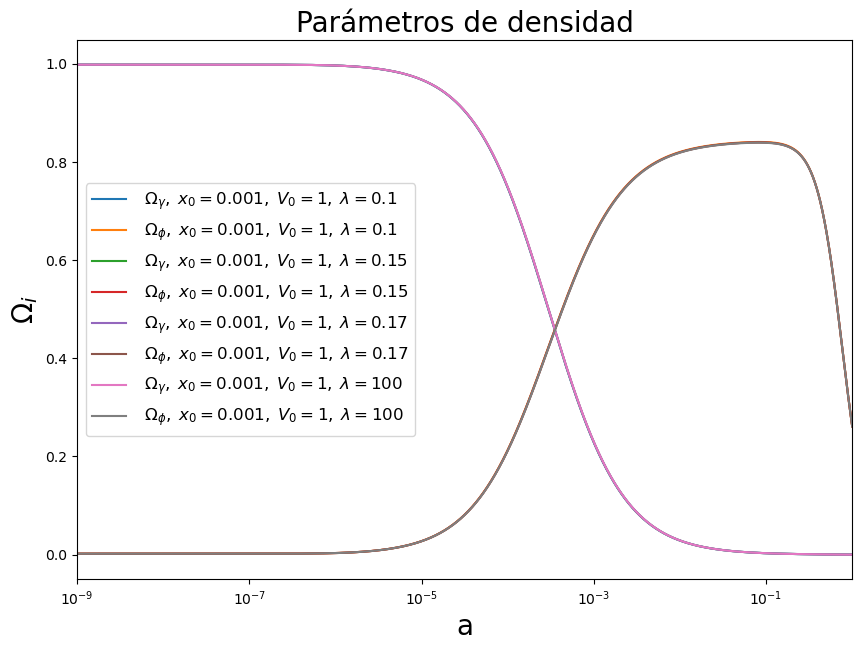

In [7]:
plt.figure(figsize=(10, 7))
plt.xscale("log")
plt.xlim(1e-9, 1)
for i, (x, V0, lam) in enumerate(combinations0[:4]):
    plt.plot(a_all0[i], Omega_rad_all0[i], label=f" $\Omega _{{\gamma}}, \; x_0 = {x}, \; V_0 = {V0}, \; \lambda = {lam}$")
    plt.plot(a_all0[i], Omega_sch_all0[i], label=f" $\Omega _{{\phi}}, \; x_0 = {x}, \; V_0 = {V0}, \; \lambda = {lam}$")
    
plt.title('Parámetros de densidad', fontsize=20)
plt.xlabel('a', fontsize=20)
plt.ylabel('$\Omega _{i}$', fontsize=20)
plt.legend(fontsize=12)

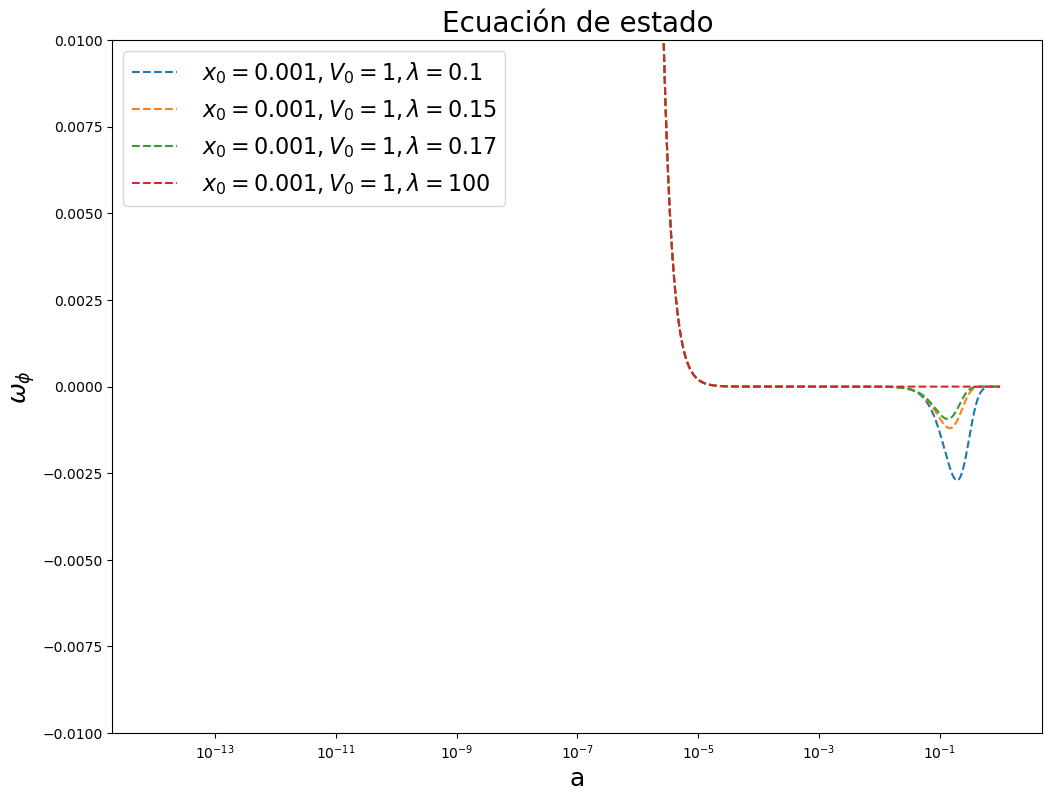

In [8]:
#plt.yscale("log")
plt.figure(figsize=(12, 9))
#plt.xlim(1e-10,1)

plt.xscale("log")
for i, (x, V0, lam) in enumerate(combinations0[:4]):
#plt.plot(a,w_sch0,"--", color="purple",label="$\omega _{\phi}$")
    plt.plot(a_all0[i], w_sch_all0[i],"--",label=f" $x_0 = {x}, V_0 = {V0}, \lambda = {lam}$")


#plt.plot(a,1/3, color="red",label="$\omega _{sch}$")
plt.ylim(-0.01,0.01)

plt.title('Ecuación de estado', fontsize=20)
plt.xlabel('a',fontsize=18)
plt.ylabel('$\omega _{\phi}$',fontsize=18)
plt.legend(fontsize=16)

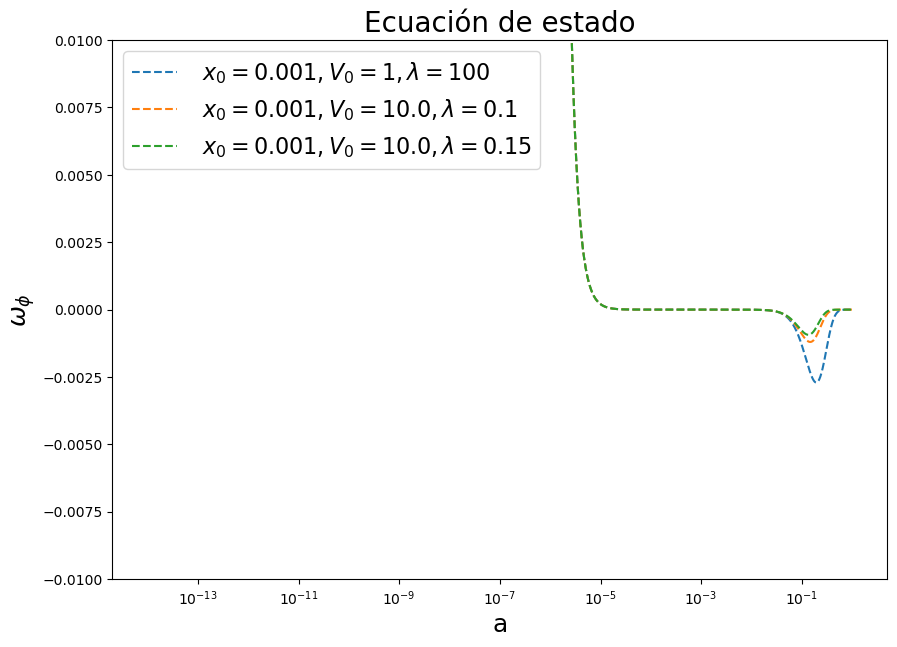

In [9]:
#plt.yscale("log")
plt.figure(figsize=(10, 7))
#plt.xlim(1e-10,1)

plt.xscale("log")
for i, (x, V0, lam) in enumerate(combinations0[3:6]):
#plt.plot(a,w_sch0,"--", color="purple",label="$\omega _{\phi}$")
    plt.plot(a_all0[i], w_sch_all0[i],"--",label=f" $x_0 = {x}, V_0 = {V0}, \lambda = {lam}$")


#plt.plot(a,1/3, color="red",label="$\omega _{sch}$")
plt.ylim(-0.01,0.01)

plt.title('Ecuación de estado', fontsize=20)
plt.xlabel('a',fontsize=18)
plt.ylabel('$\omega _{\phi}$',fontsize=18)
plt.legend(fontsize=16)

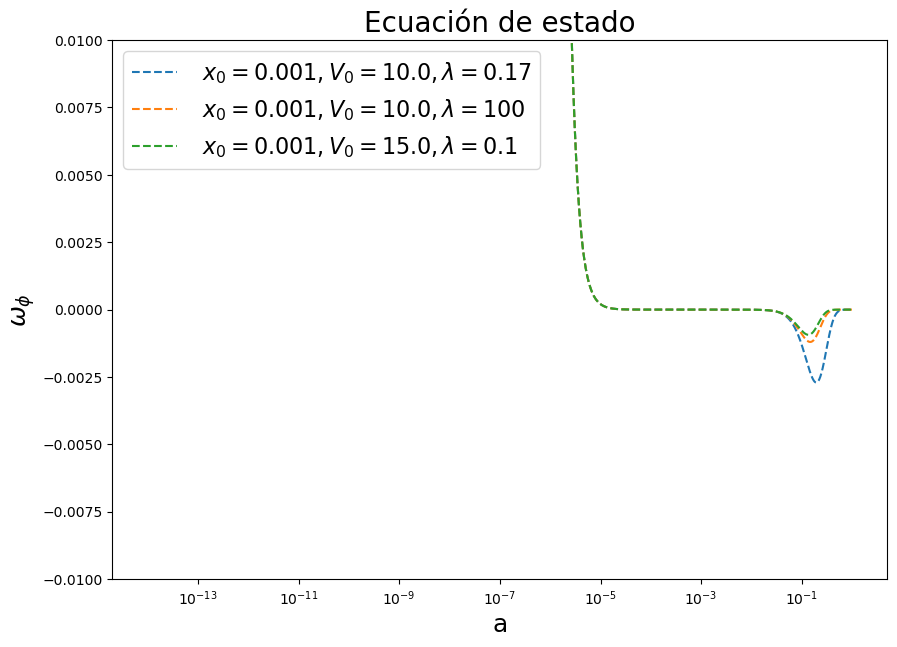

In [10]:
#plt.yscale("log")
plt.figure(figsize=(10, 7))
#plt.xlim(1e-10,1)

plt.xscale("log")
for i, (x, V0, lam) in enumerate(combinations0[6:9]):
#plt.plot(a,w_sch0,"--", color="purple",label="$\omega _{\phi}$")
    plt.plot(a_all0[i], w_sch_all0[i],"--",label=f" $x_0 = {x}, V_0 = {V0}, \lambda = {lam}$")


#plt.plot(a,1/3, color="red",label="$\omega _{sch}$")
plt.ylim(-0.01,0.01)

plt.title('Ecuación de estado', fontsize=20)
plt.xlabel('a',fontsize=18)
plt.ylabel('$\omega _{\phi}$',fontsize=18)
plt.legend(fontsize=16)

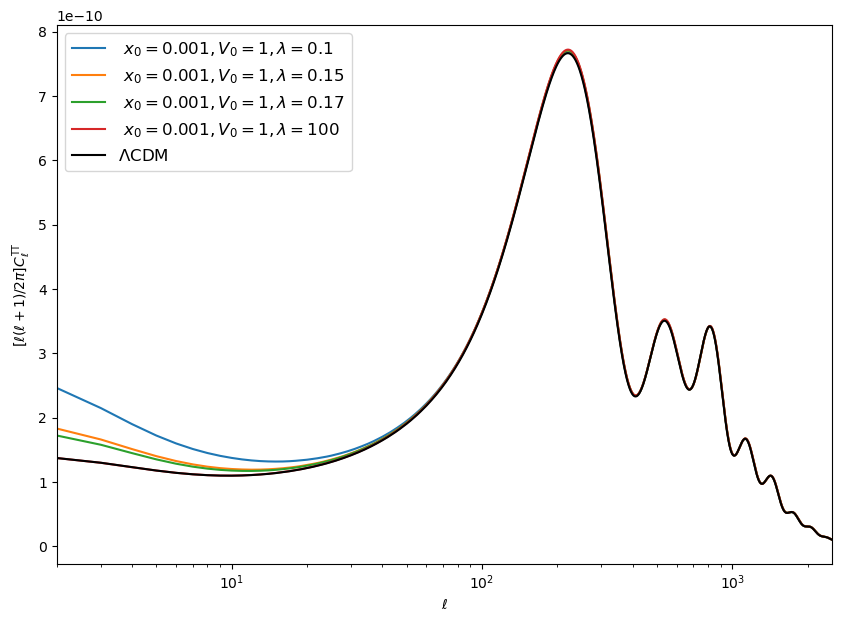

In [11]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x, V0, lam) in enumerate(combinations0[:4]):
    plt.plot(ll_all0[i], clTT_all0[i]*ll_all0[i]*(ll_all0[i]+1)/2./pi, label=f" $x_0 = {x}, V_0 = {V0}, \lambda = {lam}$")

#plt.plot(ll, clTT*ll*(ll+1)/2./pi, color='black', label = "$\Lambda$CDM ")
plt.plot(ll_lcdm, clTT_lcdm * ll_lcdm * (ll_lcdm + 1)/2./pi, color='black', label = "$\Lambda$CDM ")
    
plt.legend(fontsize=12)
plt.show()

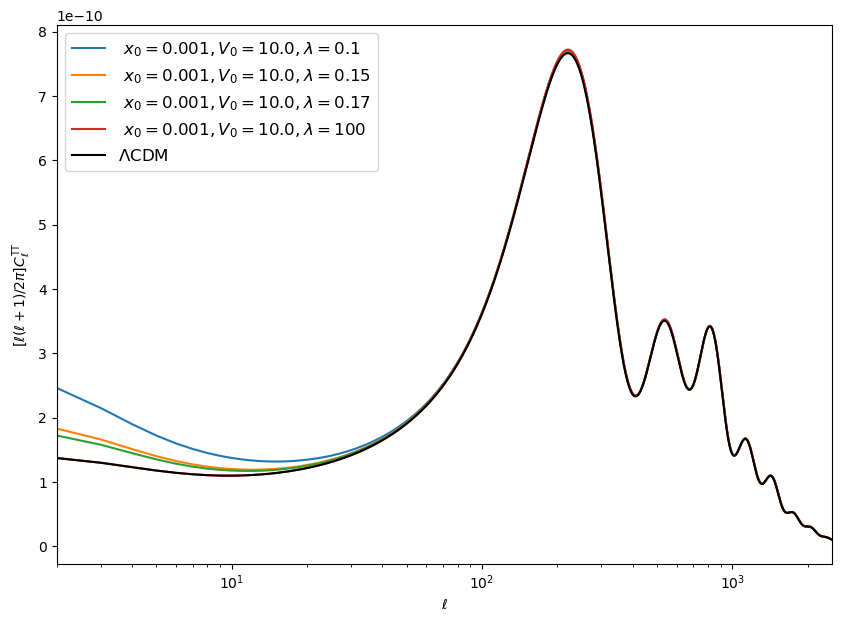

In [12]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x, V0, lam) in enumerate(combinations0[4:8]):
    plt.plot(ll_all0[i], clTT_all0[i]*ll_all0[i]*(ll_all0[i]+1)/2./pi, label=f" $x_0 = {x}, V_0 = {V0}, \lambda = {lam}$")

#plt.plot(ll,clTT*ll*(ll+1)/2./pi, color='black', label = "$\Lambda$CDM ")
plt.plot(ll_lcdm, clTT_lcdm * ll_lcdm * (ll_lcdm + 1)/2./pi, color='black', label = "$\Lambda$CDM ")
   
plt.legend(fontsize=12)
plt.show()

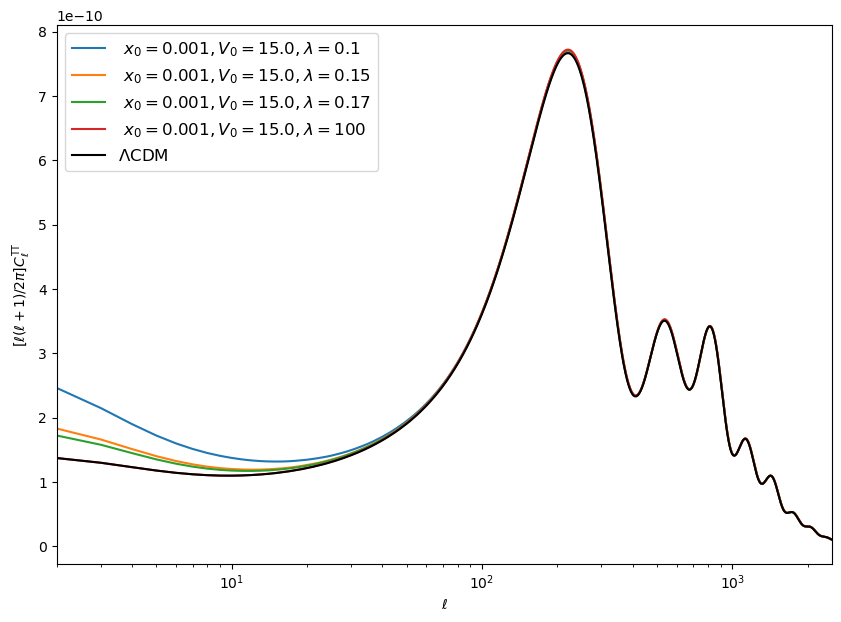

In [13]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x, V0, lam) in enumerate(combinations0[8:12]):
    plt.plot(ll_all0[i], clTT_all0[i]*ll_all0[i]*(ll_all0[i]+1)/2./pi, label=f" $x_0 = {x}, V_0 = {V0}, \lambda = {lam}$")
    
plt.plot(ll_lcdm,clTT_lcdm*ll_lcdm*(ll_lcdm+1)/2./pi, color='black', label = "$\Lambda$CDM ")

plt.legend(fontsize=12)
plt.show()

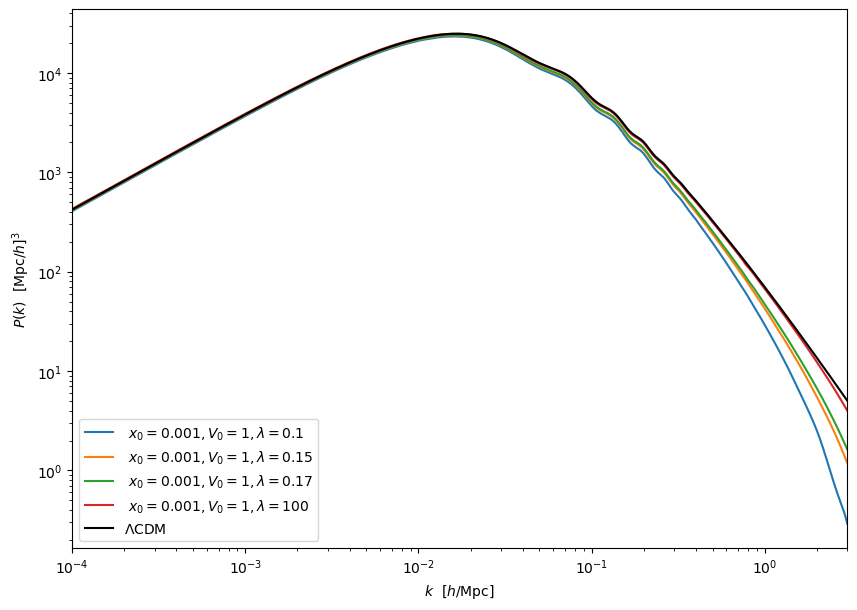

In [14]:
# plot P(k)
plt.figure(figsize=(10, 7))
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x0, V0, lam) in enumerate(combinations0[:4]):
    plt.plot(kk,Pk_all0[i], label = f" $x_0 = {x0}, V_0 = {V0}, \lambda = {lam}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

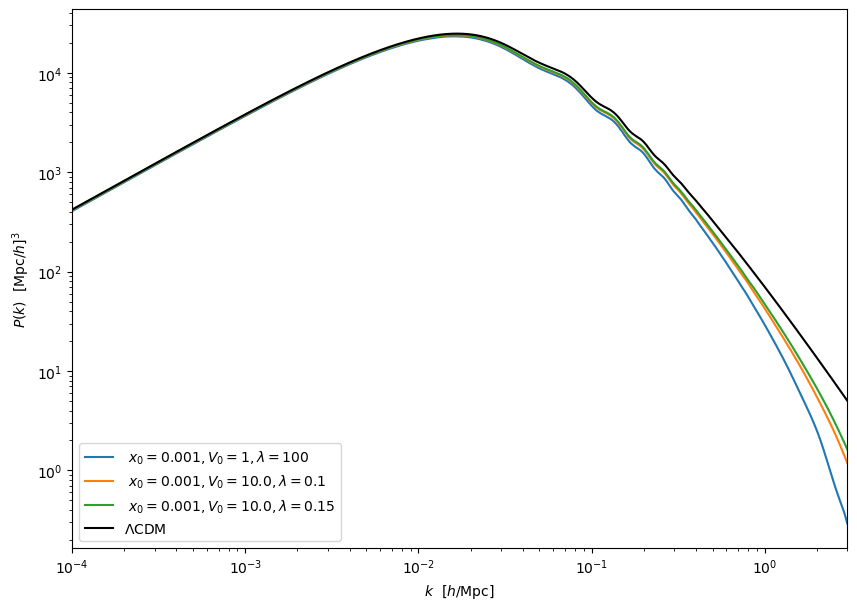

In [15]:
# plot P(k)
plt.figure(figsize=(10, 7))
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x0, V0, lam) in enumerate(combinations0[3:6]):
    plt.plot(kk,Pk_all0[i], label = f" $x_0 = {x0}, V_0 = {V0}, \lambda = {lam}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

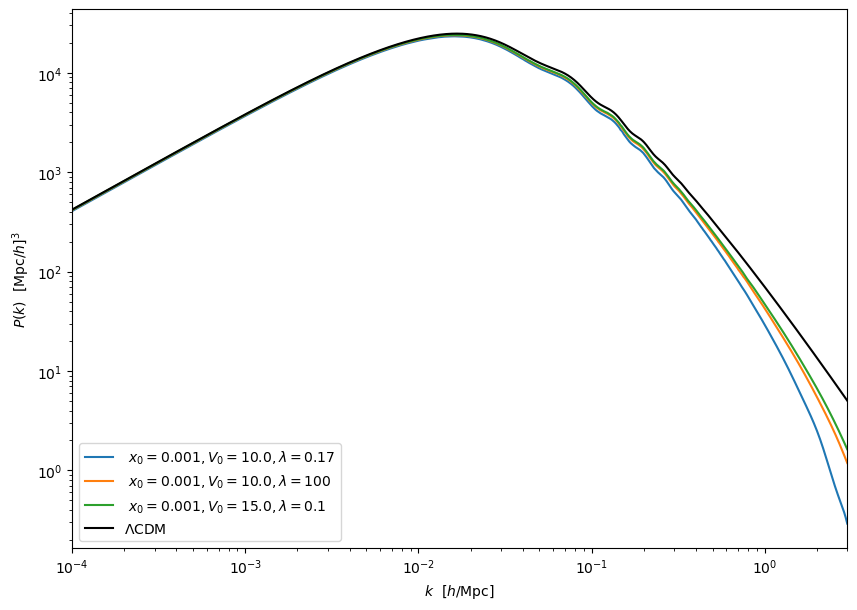

In [16]:
# plot P(k)
plt.figure(figsize=(10, 7))
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x0, V0, lam) in enumerate(combinations0[6:9]):
    plt.plot(kk,Pk_all0[i], label = f" $x_0 = {x0}, V_0 = {V0}, \lambda = {lam}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

In [17]:
common_settings1 = {
    'output': 'mPk,tCl,pCl,lCl',
    'P_k_max_1/Mpc': 3.0,
    'k_output_values': str(k_out).strip('[]'),
    'h': 0.6732117,
    'Omega_fld': 0,
    'Omega_smg': -1,
    'Omega_Lambda': 0.69,
    'omega_b': 0.022032,
    'Omega_cdm': 0,
    'gravity_model': 'quintessence_monomial',
    'theta_schm': 2.7e-19,
    'DM_schm': 0.26,
    'h_schm': 1,
    'A_s': 2.100549e-09,
    'n_s': 0.9660499,
    'tau_reio': 0.05430842,
    'compute damping scale': 'yes',
    'lensing':'yes'
}

# Lista de valores para x0_schm, V0_schm y lambda_schm
x_variable1 = [0.01]
V0_variable1 = [1, 5, 1e1]
lambda_variable1 = [0.05, 0.07, 0.1,0.2]  # Lista de valores para lambda_schm

# Generar todas las combinaciones de x0_schm, V0_schm y lambda_schm
combinations1 = list(itertools.product(x_variable1, V0_variable1, lambda_variable1))

# Background
z_all1 = []
a_all1 = []
Omega_rad_all1 = []
Omega_bar_all1 = []
Omega_lambda_all1 = []
Omega_sch_all1 = []
w_sch_all1 = []
rho_rel_all1 = []
integral_all1 = []

# Listas para perturbaciones lineales
clTT_all1 = []
clEE_all1 = []
clPP_all1 = []
Pk_all1 = []
ll_all1 = []

# Ciclo para iterar sobre las combinaciones de x0_schm, V0_schm y lambda_schm
for x1, V01, lam1 in combinations1:
    common_settings1['x0_schm'] = x1        # Actualizar el valor de x0_schm
    common_settings1['V0_schm'] = V01       # Actualizar el valor de V0_schm
    common_settings1['lambda_schm'] = lam1  # Actualizar el valor de lambda_schm
    
    print(f"Iniciando cálculos con la combinación: x0={x1},V0={V01}, lambda={lam1}")
    
    # Crear una nueva instancia de Class y configurar
    cosmo = Class()
    cosmo.set(common_settings1)
    cosmo.compute()
    
    # Obtener el background
    background = cosmo.get_background()

    # Extraer las cantidades necesarias del background
    z = background['z']                    # Redshift
    a = 1 / (1 + z)                        # Factor de escala
    rho_gamma = background['(.)rho_g']     # Densidad de energía de fotones
    rho_nu = background['(.)rho_ur']       # Densidad de energía de neutrinos relativistas
    rad = rho_gamma + rho_nu               # Radiación total (fotones + neutrinos relativistas)
    bar = background['(.)rho_b']           # Densidad de energía bariónica
    lamb = background['(.)rho_lambda']     # Densidad de energía de la constante cosmológica
    rho_crit = background['(.)rho_crit']   # Densidad crítica
    rho_sch = background['(.)rho_smg']     # Densidad de energía del campo escalar (quintessencia)
    p_sch = background['(.)p_smg']         # Presión del campo escalar
    
    # Calcular las fracciones de densidad
    Omega_rad = rad / rho_crit
    Omega_bar = bar / rho_crit
    Omega_lambda = lamb / rho_crit
    Omega_sch = rho_sch / rho_crit
    
    # Calcular el parámetro de ecuación de estado w_sch
    #w_sch = (p_sch - lamb) / (rho_sch + lamb)
    w_sch = p_sch / rho_sch
    
    # Densidad relativista total
    rho_rel = rad + 3 * p_sch

    # Guardar los resultados en las listas correspondientes
    z_all1.append(z)
    a_all1.append(a)
    Omega_rad_all1.append(Omega_rad)
    Omega_bar_all1.append(Omega_bar)
    Omega_lambda_all1.append(Omega_lambda)
    Omega_sch_all1.append(Omega_sch)
    w_sch_all1.append(w_sch)
    rho_rel_all1.append(rho_rel)
    
    # Obtener los espectros angulares C_l
    cls = cosmo.lensed_cl(2500)  # Espectros angulares lensed hasta l=2500
    ll = cls['ell'][2:]  # Valores de l
    clTT = cls['tt'][2:]  # C_l^TT
    clEE = cls['ee'][2:]  # C_l^EE
    clPP = cls['pp'][2:]  # C_l^PP
    
    # Guardar C_l en las listas correspondientes
    clTT_all1.append(clTT)
    clEE_all1.append(clEE)
    clPP_all1.append(clPP)
    ll_all1.append(ll)

    # Obtener el espectro de potencia P(k)
    kk = np.logspace(-4, np.log10(3), 1000)  # Valores de k en h/Mpc
    Pk = []  # Inicializar lista para P(k)

    h = cosmo.h()  # Obtener h (para conversión de k)
    for k in kk:
        Pk.append(cosmo.pk(k * h, 0.) * h ** 3)  # P(k) en (Mpc/h)^3

    # Guardar los resultados de P(k)
    Pk_all1.append(Pk)
    
    # Limpiar la memoria de CLASS al final de cada ciclo
    cosmo.struct_cleanup()
    print(f"El cálculo se ha completado con la combinación x0={x1},V0={V01}, lambda={lam1}")
    

# Graficar los resultados

print("cálculos terminados")



Iniciando cálculos con la combinación: x0=0.01,V0=1, lambda=0.05


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26199
aquí voy y todo bien 2.76201
aquí voy y todo bien 2.012
aquí voy y todo bien 2.0864
aquí voy y todo bien 2.0492
aquí voy y todo bien 2.08566
aquí voy y todo bien 2.06743
aquí voy y todo bien 2.08566


El cálculo se ha completado con la combinación x0=0.01,V0=1, lambda=0.05
Iniciando cálculos con la combinación: x0=0.01,V0=1, lambda=0.07
El cálculo se ha completado con la combinación x0=0.01,V0=1, lambda=0.07
Iniciando cálculos con la combinación: x0=0.01,V0=1, lambda=0.1


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26165
aquí voy y todo bien 2.75674
aquí voy y todo bien 2.00919
aquí voy y todo bien 2.08366
aquí voy y todo bien 2.04643
aquí voy y todo bien 2.08292
aquí voy y todo bien 2.08329
aquí voy y todo bien 2.08292
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26147
aquí voy y todo bien 2.75396
aquí voy y todo bien 2.00772
aquí voy y todo bien 2.08221
aquí voy y todo bien 2.04496
aquí voy y todo bien 2.08147
aquí voy y todo bien 2.06322
aquí voy y todo bien 2.08147
aquí voy y todo bien 1


El cálculo se ha completado con la combinación x0=0.01,V0=1, lambda=0.1
Iniciando cálculos con la combinación: x0=0.01,V0=1, lambda=0.2
El cálculo se ha completado con la combinación x0=0.01,V0=1, lambda=0.2
Iniciando cálculos con la combinación: x0=0.01,V0=5, lambda=0.05


aquí voy y todo bien 1
aquí voy y todo bien 1.26134
aquí voy y todo bien 2.75196
aquí voy y todo bien 2.00665
aquí voy y todo bien 2.08117
aquí voy y todo bien 2.04391
aquí voy y todo bien 2.08043
aquí voy y todo bien 2.06217
aquí voy y todo bien 2.08043
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26478
aquí voy y todo bien 2.80568
aquí voy y todo bien 2.03523
aquí voy y todo bien 2.10906
aquí voy y todo bien 2.07215
aquí voy y todo bien 2.1083
aquí voy y todo bien 2.09022
aquí voy y todo bien 2.1083


El cálculo se ha completado con la combinación x0=0.01,V0=5, lambda=0.05
Iniciando cálculos con la combinación: x0=0.01,V0=5, lambda=0.07


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26307
aquí voy y todo bien 2.77872
aquí voy y todo bien 2.0209
aquí voy y todo bien 2.0951
aquí voy y todo bien 2.058
aquí voy y todo bien 2.09434
aquí voy y todo bien 2.07617
aquí voy y todo bien 2.09434
aquí voy y todo bien 1


El cálculo se ha completado con la combinación x0=0.01,V0=5, lambda=0.07
Iniciando cálculos con la combinación: x0=0.01,V0=5, lambda=0.1
El cálculo se ha completado con la combinación x0=0.01,V0=5, lambda=0.1
Iniciando cálculos con la combinación: x0=0.01,V0=5, lambda=0.2


aquí voy y todo bien 1
aquí voy y todo bien 1.26217
aquí voy y todo bien 2.76467
aquí voy y todo bien 2.01342
aquí voy y todo bien 2.08779
aquí voy y todo bien 2.0506
aquí voy y todo bien 2.08704
aquí voy y todo bien 2.06882
aquí voy y todo bien 2.08704
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26152
aquí voy y todo bien 2.75463
aquí voy y todo bien 2.00807
aquí voy y todo bien 2.08257
aquí voy y todo bien 2.04532
aquí voy y todo bien 2.08182
aquí voy y todo bien 2.0822
aquí voy y todo bien 2.08182


El cálculo se ha completado con la combinación x0=0.01,V0=5, lambda=0.2
Iniciando cálculos con la combinación: x0=0.01,V0=10.0, lambda=0.05


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26827
aquí voy y todo bien 2.86222
aquí voy y todo bien 2.06525
aquí voy y todo bien 2.13821
aquí voy y todo bien 2.10173
aquí voy y todo bien 2.13742
aquí voy y todo bien 2.11958
aquí voy y todo bien 2.13742


El cálculo se ha completado con la combinación x0=0.01,V0=10.0, lambda=0.05
Iniciando cálculos con la combinación: x0=0.01,V0=10.0, lambda=0.07


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26485
aquí voy y todo bien 2.8067
aquí voy y todo bien 2.03578
aquí voy y todo bien 2.1096
aquí voy y todo bien 2.07269
aquí voy y todo bien 2.10883
aquí voy y todo bien 2.09076
aquí voy y todo bien 2.10883


El cálculo se ha completado con la combinación x0=0.01,V0=10.0, lambda=0.07
Iniciando cálculos con la combinación: x0=0.01,V0=10.0, lambda=0.1
El cálculo se ha completado con la combinación x0=0.01,V0=10.0, lambda=0.1
Iniciando cálculos con la combinación: x0=0.01,V0=10.0, lambda=0.2


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26304
aquí voy y todo bien 2.77816
aquí voy y todo bien 2.0206
aquí voy y todo bien 2.09481
aquí voy y todo bien 2.05771
aquí voy y todo bien 2.09406
aquí voy y todo bien 2.09443
aquí voy y todo bien 2.09406
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26174
aquí voy y todo bien 2.75799
aquí voy y todo bien 2.00986
aquí voy y todo bien 2.08431
aquí voy y todo bien 2.04709
aquí voy y todo bien 2.08357
aquí voy y todo bien 2.08394
aquí voy y todo bien 2.08357


El cálculo se ha completado con la combinación x0=0.01,V0=10.0, lambda=0.2
cálculos terminados


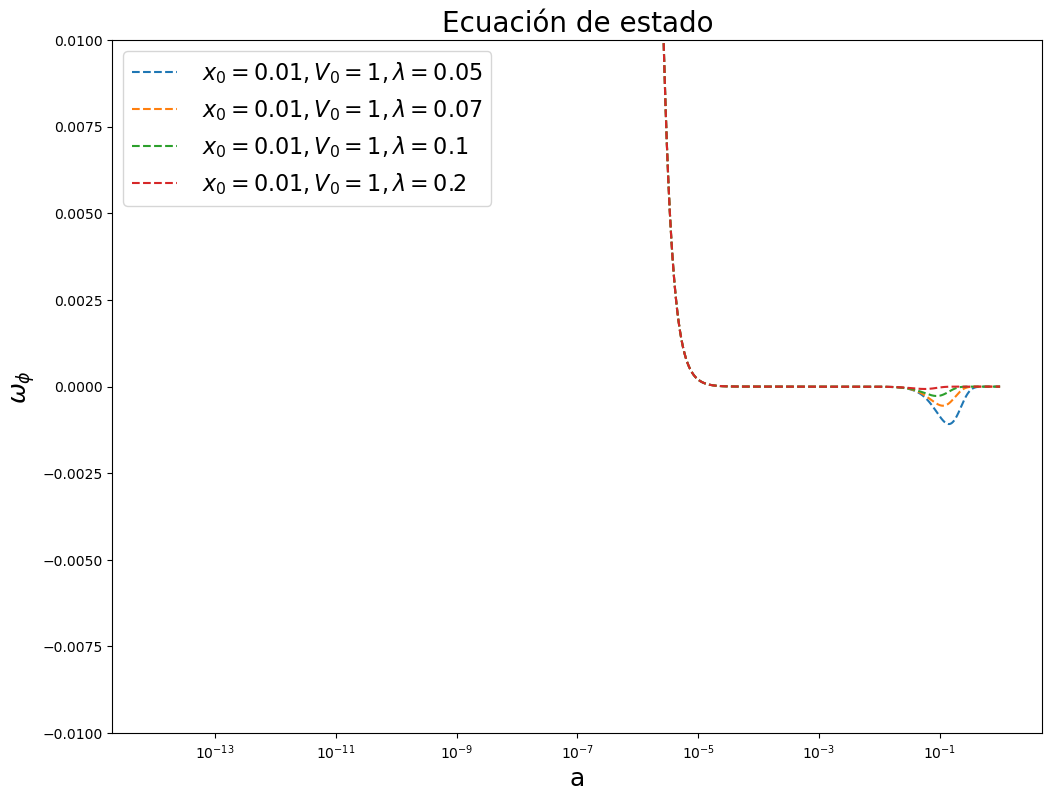

In [18]:
#plt.yscale("log")
plt.figure(figsize=(12, 9))
#plt.xlim(1e-10,1)

plt.xscale("log")
for i, (x, V0, lam) in enumerate(combinations1[:4]):
#plt.plot(a,w_sch0,"--", color="purple",label="$\omega _{\phi}$")
    plt.plot(a_all1[i], w_sch_all1[i],"--",label=f" $x_0 = {x}, V_0 = {V0}, \lambda = {lam}$")


#plt.plot(a,1/3, color="red",label="$\omega _{sch}$")
plt.ylim(-0.01,0.01)

plt.title('Ecuación de estado', fontsize=20)
plt.xlabel('a',fontsize=18)
plt.ylabel('$\omega _{\phi}$',fontsize=18)
plt.legend(fontsize=16)

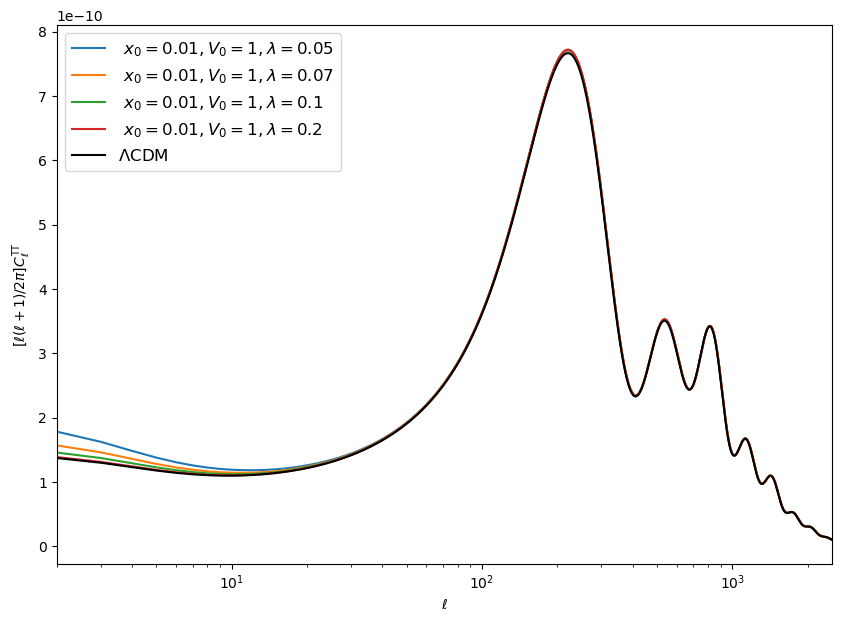

In [19]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x1, V01, lam1) in enumerate(combinations1[:4]):
    plt.plot(ll_all1[i], clTT_all1[i]*ll_all1[i]*(ll_all1[i]+1)/2./pi, label=f" $x_0 = {x1}, V_0 = {V01}, \lambda = {lam1}$")
    
plt.plot(ll_lcdm,clTT_lcdm*ll_lcdm*(ll_lcdm+1)/2./pi, color='black', label = "$\Lambda$CDM ")

plt.legend(fontsize=12)
plt.show()

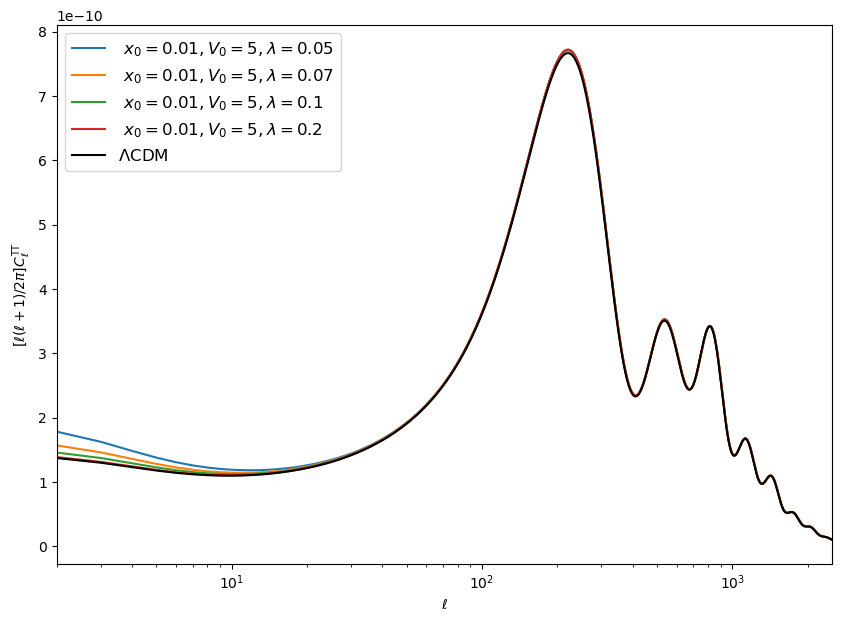

In [20]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x1, V01, lam1) in enumerate(combinations1[4:8]):
    plt.plot(ll_all1[i], clTT_all1[i]*ll_all1[i]*(ll_all1[i]+1)/2./pi, label=f" $x_0 = {x1}, V_0 = {V01}, \lambda = {lam1}$")

plt.plot(ll_lcdm,clTT_lcdm*ll_lcdm*(ll_lcdm+1)/2./pi, color='black', label = "$\Lambda$CDM ")
    
plt.legend(fontsize=12)
plt.show()

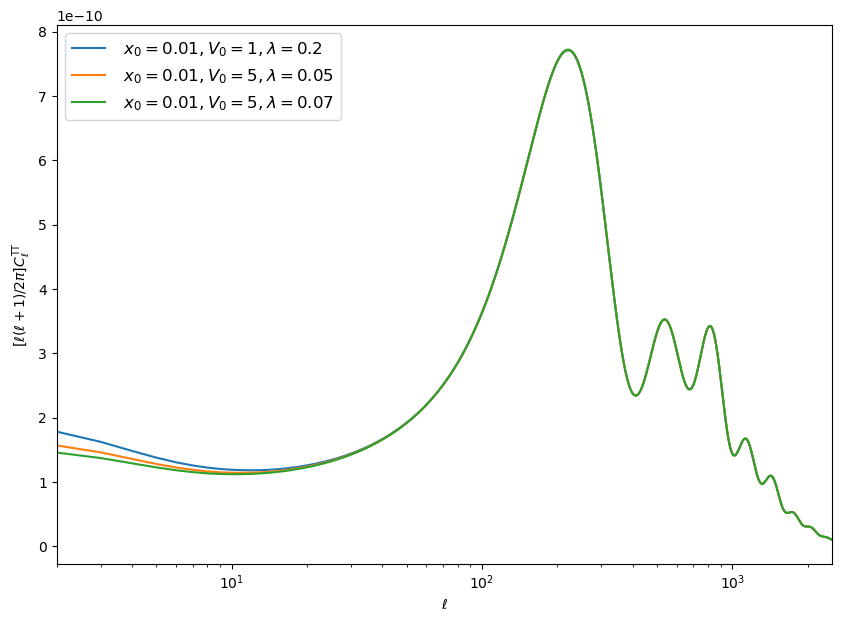

In [21]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x1, V01, lam1) in enumerate(combinations1[3:6]):
    plt.plot(ll_all1[i], clTT_all1[i]*ll_all1[i]*(ll_all1[i]+1)/2./pi, label=f" $x_0 = {x1}, V_0 = {V01}, \lambda = {lam1}$")
plt.legend(fontsize=12)
plt.show()

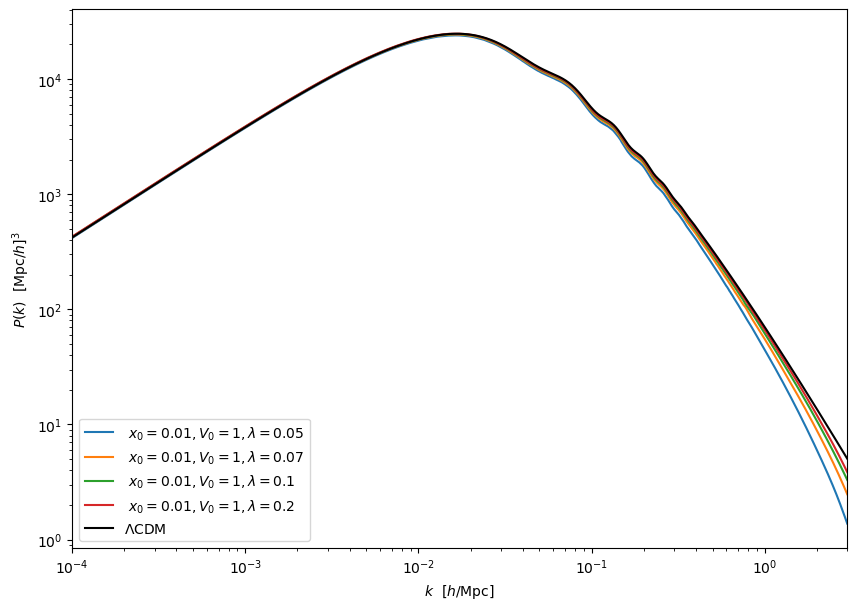

In [22]:
# plot P(k)
plt.figure(figsize=(10, 7))
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x1, V01, lam1) in enumerate(combinations1[:4]):
    plt.plot(kk,Pk_all1[i], label = f" $x_0 = {x1}, V_0 = {V01}, \lambda = {lam1}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

In [23]:
common_settings2 = {
    'output': 'mPk,tCl,pCl,lCl',
    'P_k_max_1/Mpc': 3.0,
    'k_output_values': str(k_out).strip('[]'),
    'h': 0.6732117,
    'Omega_fld': 0,
    'Omega_smg': -1,
    'Omega_Lambda': 0.69,
    'omega_b': 0.022032,
    'Omega_cdm': 0,
    'gravity_model': 'quintessence_monomial',
    'theta_schm': 2.7e-19,
    'DM_schm': 0.26,
    'h_schm': 1,
    'A_s': 2.100549e-09,
    'n_s': 0.9660499,
    'tau_reio': 0.05430842,
    'compute damping scale': 'yes',
    'lensing':'yes'
}

# Lista de valores para x0_schm, V0_schm y lambda_schm
x_variable2 = [0.1]
V0_variable2 = [1, 1e1, 2e1]
lambda_variable2 = [0.007, 0.009, 0.01, 0.1]  # Lista de valores para lambda_schm

# Generar todas las combinaciones de x0_schm, V0_schm y lambda_schm
combinations2 = list(itertools.product(x_variable2, V0_variable2, lambda_variable2))

# Background
z_all2 = []
a_all2 = []
Omega_rad_all2 = []
Omega_bar_all2 = []
Omega_lambda_all2 = []
Omega_sch_all2 = []
w_sch_all2 = []
rho_rel_all2 = []
integral_all2 = []

# Listas para perturbaciones lineales
clTT_all2 = []
clEE_all2 = []
clPP_all2 = []
Pk_all2 = []
ll_all2 = []

# Ciclo para iterar sobre las combinaciones de x0_schm, V0_schm y lambda_schm
for x2, V02, lam2 in combinations2:
    common_settings2['x0_schm'] = x2        # Actualizar el valor de x0_schm
    common_settings2['V0_schm'] = V02       # Actualizar el valor de V0_schm
    common_settings2['lambda_schm'] = lam2  # Actualizar el valor de lambda_schm
    print(f"iniciando cálculos con la combinación: x0={x2},V0={V02}, lambda={lam2}")
    # Crear una nueva instancia de Class y configurar
    cosmo = Class()
    cosmo.set(common_settings2)
    cosmo.compute()
    
    # Obtener el background
    background = cosmo.get_background()

    # Extraer las cantidades necesarias del background
    z = background['z']                    # Redshift
    a = 1 / (1 + z)                        # Factor de escala
    rho_gamma = background['(.)rho_g']     # Densidad de energía de fotones
    rho_nu = background['(.)rho_ur']       # Densidad de energía de neutrinos relativistas
    rad = rho_gamma + rho_nu               # Radiación total (fotones + neutrinos relativistas)
    bar = background['(.)rho_b']           # Densidad de energía bariónica
    lamb = background['(.)rho_lambda']     # Densidad de energía de la constante cosmológica
    rho_crit = background['(.)rho_crit']   # Densidad crítica
    rho_sch = background['(.)rho_smg']     # Densidad de energía del campo escalar (quintessencia)
    p_sch = background['(.)p_smg']         # Presión del campo escalar
    
    # Calcular las fracciones de densidad
    Omega_rad = rad / rho_crit
    Omega_bar = bar / rho_crit
    Omega_lambda = lamb / rho_crit
    Omega_sch = rho_sch / rho_crit
    
    # Calcular el parámetro de ecuación de estado w_sch
    #w_sch = (p_sch - lamb) / (rho_sch + lamb)
    w_sch = p_sch / rho_sch
    
    # Densidad relativista total
    rho_rel = rad + 3 * p_sch

    # Guardar los resultados en las listas correspondientes
    z_all2.append(z)
    a_all2.append(a)
    Omega_rad_all2.append(Omega_rad)
    Omega_bar_all2.append(Omega_bar)
    Omega_lambda_all2.append(Omega_lambda)
    Omega_sch_all2.append(Omega_sch)
    w_sch_all2.append(w_sch)
    rho_rel_all2.append(rho_rel)
    
    # Obtener los espectros angulares C_l
    cls = cosmo.lensed_cl(2500)  # Espectros angulares lensed hasta l=2500
    ll = cls['ell'][2:]  # Valores de l
    clTT = cls['tt'][2:]  # C_l^TT
    clEE = cls['ee'][2:]  # C_l^EE
    clPP = cls['pp'][2:]  # C_l^PP
    
    # Guardar C_l en las listas correspondientes
    clTT_all2.append(clTT)
    clEE_all2.append(clEE)
    clPP_all2.append(clPP)
    ll_all2.append(ll)

    # Obtener el espectro de potencia P(k)
    kk = np.logspace(-4, np.log10(3), 1000)  # Valores de k en h/Mpc
    Pk = []  # Inicializar lista para P(k)

    h = cosmo.h()  # Obtener h (para conversión de k)
    for k in kk:
        Pk.append(cosmo.pk(k * h, 0.) * h ** 3)  # P(k) en (Mpc/h)^3

    # Guardar los resultados de P(k)
    Pk_all2.append(Pk)
    
    # Limpiar la memoria de CLASS al final de cada ciclo
    cosmo.struct_cleanup()
    print(f"El cálculo se ha completado con la combinación x0={x2},V0={V02}, lambda={lam2}")

# Graficar los resultados

print("cálculos terminados")



iniciando cálculos con la combinación: x0=0.1,V0=1, lambda=0.007
El cálculo se ha completado con la combinación x0=0.1,V0=1, lambda=0.007
iniciando cálculos con la combinación: x0=0.1,V0=1, lambda=0.009


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26492
aquí voy y todo bien 2.80821
aquí voy y todo bien 2.03656
aquí voy y todo bien 2.11034
aquí voy y todo bien 2.07345
aquí voy y todo bien 2.10958
aquí voy y todo bien 2.10996
aquí voy y todo bien 2.10958
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26346
aquí voy y todo bien 2.78503
aquí voy y todo bien 2.02424
aquí voy y todo bien 2.09835
aquí voy y todo bien 2.0613
aquí voy y todo bien 2.0976
aquí voy y todo bien 2.07945
aquí voy y todo bien 2.0976


El cálculo se ha completado con la combinación x0=0.1,V0=1, lambda=0.009
iniciando cálculos con la combinación: x0=0.1,V0=1, lambda=0.01
El cálculo se ha completado con la combinación x0=0.1,V0=1, lambda=0.01
iniciando cálculos con la combinación: x0=0.1,V0=1, lambda=0.1


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26304
aquí voy y todo bien 2.77846
aquí voy y todo bien 2.02075
aquí voy y todo bien 2.09495
aquí voy y todo bien 2.05785
aquí voy y todo bien 2.09419
aquí voy y todo bien 2.07602
aquí voy y todo bien 2.09419
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26131
aquí voy y todo bien 2.75156
aquí voy y todo bien 2.00644
aquí voy y todo bien 2.08096
aquí voy y todo bien 2.0437
aquí voy y todo bien 2.08022
aquí voy y todo bien 2.08059
aquí voy y todo bien 2.08022


El cálculo se ha completado con la combinación x0=0.1,V0=1, lambda=0.1
iniciando cálculos con la combinación: x0=0.1,V0=10.0, lambda=0.007
El cálculo se ha completado con la combinación x0=0.1,V0=10.0, lambda=0.007
iniciando cálculos con la combinación: x0=0.1,V0=10.0, lambda=0.009


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.29825
aquí voy y todo bien 3.4476
aquí voy y todo bien 2.37292
aquí voy y todo bien 2.42805
aquí voy y todo bien 2.40049
aquí voy y todo bien 2.42724
aquí voy y todo bien 2.41386
aquí voy y todo bien 2.42724
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.28321
aquí voy y todo bien 3.12958
aquí voy y todo bien 2.2064
aquí voy y todo bien 2.27319
aquí voy y todo bien 2.23979
aquí voy y todo bien 2.27234
aquí voy y todo bien 2.27277
aquí voy y todo bien 2.27234
aquí voy y todo bien 1


El cálculo se ha completado con la combinación x0=0.1,V0=10.0, lambda=0.009
iniciando cálculos con la combinación: x0=0.1,V0=10.0, lambda=0.01
El cálculo se ha completado con la combinación x0=0.1,V0=10.0, lambda=0.01
iniciando cálculos con la combinación: x0=0.1,V0=10.0, lambda=0.1


aquí voy y todo bien 1
aquí voy y todo bien 1.27895
aquí voy y todo bien 3.04889
aquí voy y todo bien 2.16392
aquí voy y todo bien 2.23292
aquí voy y todo bien 2.19842
aquí voy y todo bien 2.23208
aquí voy y todo bien 2.21525
aquí voy y todo bien 2.23208
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26147
aquí voy y todo bien 2.75397
aquí voy y todo bien 2.00772
aquí voy y todo bien 2.08222
aquí voy y todo bien 2.04497
aquí voy y todo bien 2.08148
aquí voy y todo bien 2.06323
aquí voy y todo bien 2.08148
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.33685
aquí voy y todo bien 4.60095
aquí voy y todo bien 2.9689
aquí voy y todo bien 2.95032
aquí voy y todo bien 2.95961
aquí voy y todo bien 2.95069
aquí voy y todo bien 2.95515
aquí voy y todo bien 2.95069


El cálculo se ha completado con la combinación x0=0.1,V0=10.0, lambda=0.1
iniciando cálculos con la combinación: x0=0.1,V0=20.0, lambda=0.007
El cálculo se ha completado con la combinación x0=0.1,V0=20.0, lambda=0.007
iniciando cálculos con la combinación: x0=0.1,V0=20.0, lambda=0.009


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.3057
aquí voy y todo bien 3.62564
aquí voy y todo bien 2.46567
aquí voy y todo bien 2.51304
aquí voy y todo bien 2.48935
aquí voy y todo bien 2.51226
aquí voy y todo bien 2.5008
aquí voy y todo bien 2.51226


El cálculo se ha completado con la combinación x0=0.1,V0=20.0, lambda=0.009
iniciando cálculos con la combinación: x0=0.1,V0=20.0, lambda=0.01


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.29698
aquí voy y todo bien 3.41708
aquí voy y todo bien 2.35703
aquí voy y todo bien 2.41379
aquí voy y todo bien 2.38541
aquí voy y todo bien 2.41294
aquí voy y todo bien 2.39917
aquí voy y todo bien 2.41294
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26165
aquí voy y todo bien 2.75666
aquí voy y todo bien 2.00916
aquí voy y todo bien 2.08363
aquí voy y todo bien 2.04639
aquí voy y todo bien 2.08288
aquí voy y todo bien 2.06464
aquí voy y todo bien 2.08288


El cálculo se ha completado con la combinación x0=0.1,V0=20.0, lambda=0.01
iniciando cálculos con la combinación: x0=0.1,V0=20.0, lambda=0.1
El cálculo se ha completado con la combinación x0=0.1,V0=20.0, lambda=0.1
cálculos terminados


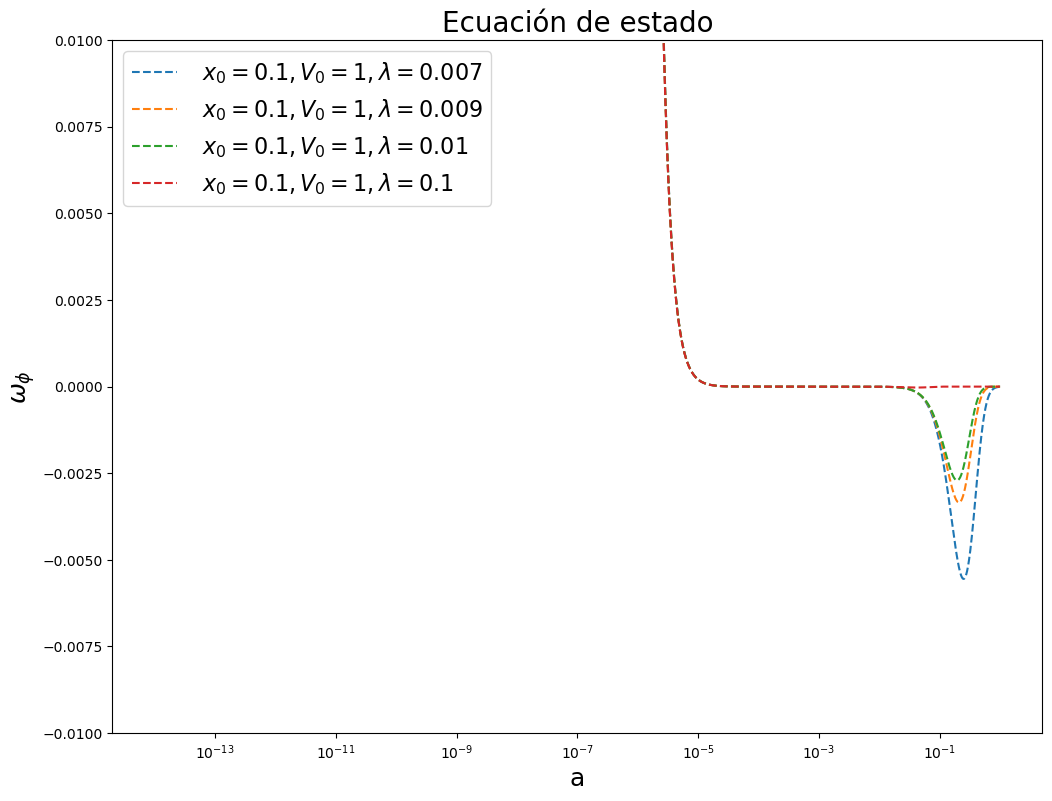

In [24]:
#plt.yscale("log")
plt.figure(figsize=(12, 9))
#plt.xlim(1e-10,1)

plt.xscale("log")
for i, (x, V0, lam) in enumerate(combinations2[:4]):
#plt.plot(a,w_sch0,"--", color="purple",label="$\omega _{\phi}$")
    plt.plot(a_all2[i], w_sch_all2[i],"--",label=f" $x_0 = {x}, V_0 = {V0}, \lambda = {lam}$")


#plt.plot(a,1/3, color="red",label="$\omega _{sch}$")

plt.title('Ecuación de estado', fontsize=20)
plt.xlabel('a',fontsize=18)
plt.ylabel('$\omega _{\phi}$',fontsize=18)
plt.ylim(-0.01,0.01)
plt.legend(fontsize=16)

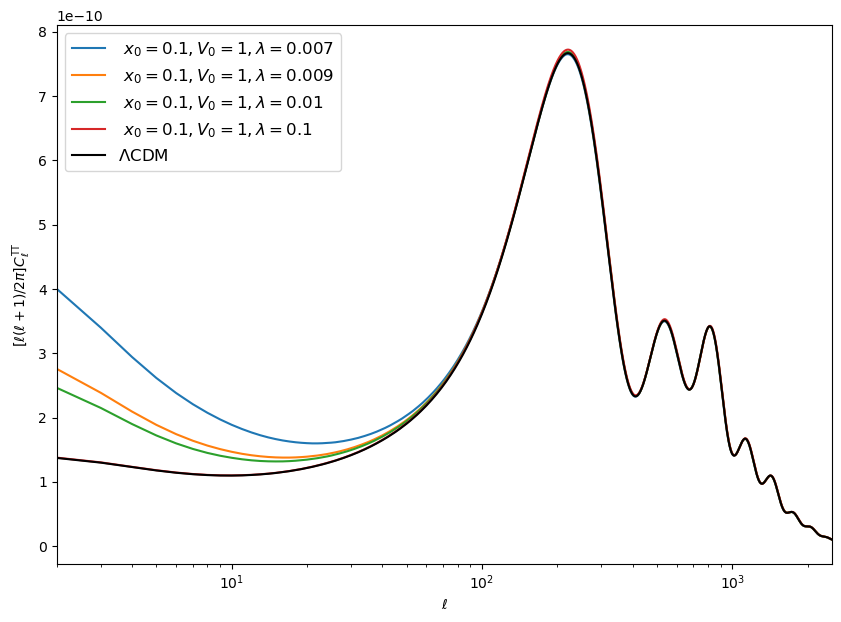

In [25]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x2, V02, lam2) in enumerate(combinations2[:4]):
    plt.plot(ll_all2[i], clTT_all2[i]*ll_all2[i]*(ll_all2[i]+1)/2./pi, label=f" $x_0 = {x2}, V_0 = {V02}, \lambda = {lam2}$")

plt.plot(ll_lcdm,clTT_lcdm*ll_lcdm*(ll_lcdm+1)/2./pi, color='black', label = "$\Lambda$CDM ")
    
plt.legend(fontsize=12)
plt.show()

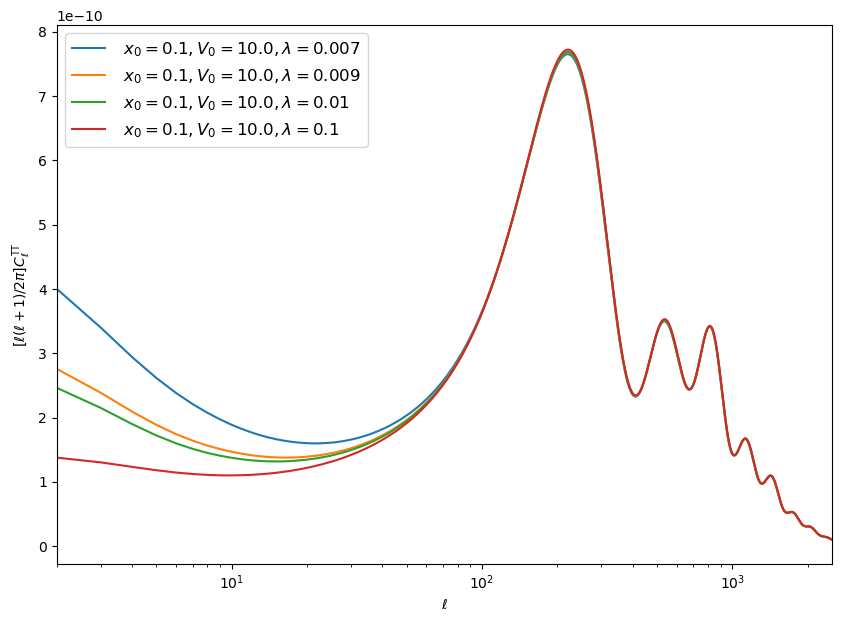

In [26]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x2, V02, lam2) in enumerate(combinations2[4:8]):
    plt.plot(ll_all2[i], clTT_all2[i]*ll_all2[i]*(ll_all2[i]+1)/2./pi, label=f" $x_0 = {x2}, V_0 = {V02}, \lambda = {lam2}$")
plt.legend(fontsize=12)
plt.show()

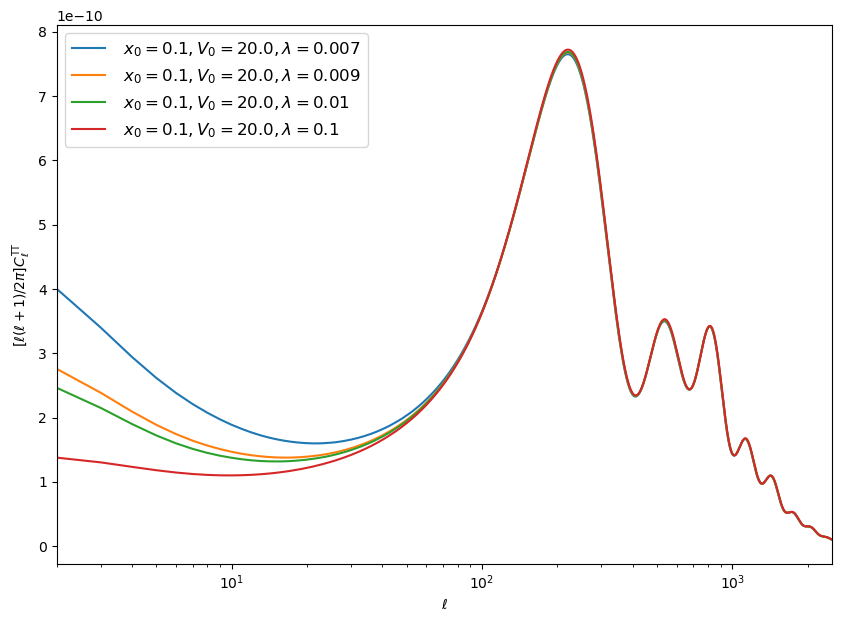

In [27]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x2, V02, lam2) in enumerate(combinations2[8:12]):
    plt.plot(ll_all2[i], clTT_all2[i]*ll_all2[i]*(ll_all2[i]+1)/2./pi, label=f" $x_0 = {x2}, V_0 = {V02}, \lambda = {lam2}$")
plt.legend(fontsize=12)
plt.show()

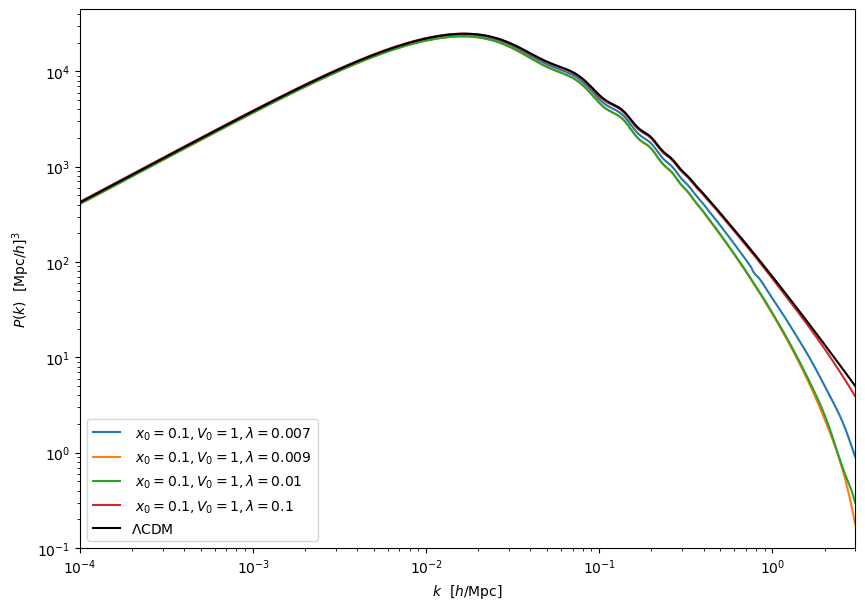

In [28]:
# plot P(k)
plt.figure(figsize=(10, 7))
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x02, V02, lam2) in enumerate(combinations2[:4]):
    plt.plot(kk,Pk_all2[i], label = f" $x_0 = {x02}, V_0 = {V02}, \lambda = {lam2}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

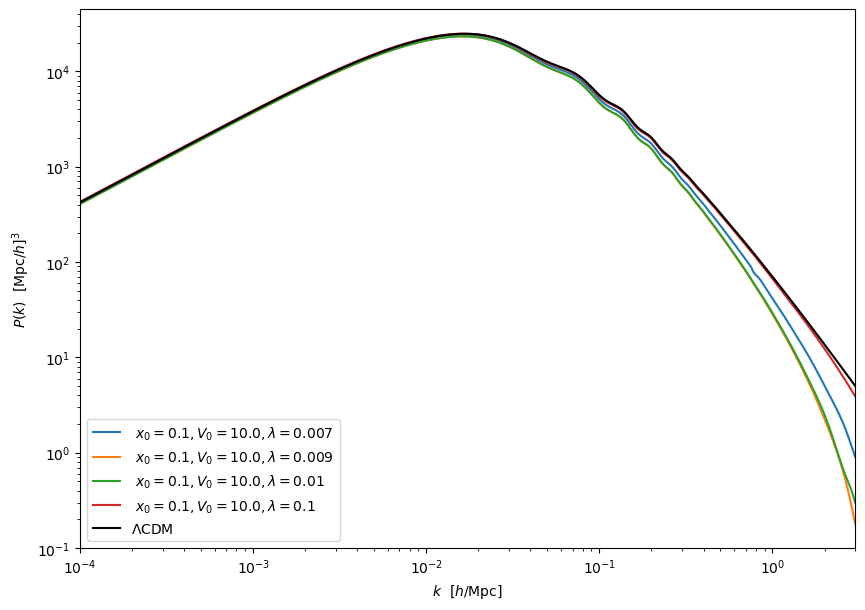

In [29]:
# plot P(k)
plt.figure(figsize=(10, 7))
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x02, V02, lam2) in enumerate(combinations2[4:8]):
    plt.plot(kk,Pk_all2[i], label = f" $x_0 = {x02}, V_0 = {V02}, \lambda = {lam2}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

In [30]:
common_settings3 = {
    'output': 'mPk,tCl,pCl,lCl',
    'P_k_max_1/Mpc': 3.0,
    'k_output_values': str(k_out).strip('[]'),
    'h': 0.6732117,
    'Omega_fld': 0,
    'Omega_smg': -1,
    'Omega_Lambda': 0.69,
    'omega_b': 0.022032,
    'Omega_cdm': 0,
    'gravity_model': 'quintessence_monomial',
    'theta_schm': 2.7e-19,
    'DM_schm': 0.26,
    'h_schm': 1,
    'A_s': 2.100549e-09,
    'n_s': 0.9660499,
    'tau_reio': 0.05430842,
    'compute damping scale': 'yes',
    'lensing':'yes'
}

# Lista de valores para x0_schm, V0_schm y lambda_schm
x_variable3 = [1]
V0_variable3 = [1, 1e1, 2e1]
lambda_variable3 = [0.005, 0.007, 0.009, 10]  # Lista de valores para lambda_schm

# Generar todas las combinaciones de x0_schm, V0_schm y lambda_schm
combinations3 = list(itertools.product(x_variable3, V0_variable3, lambda_variable3))

# Background
z_all3 = []
a_all3 = []
Omega_rad_all3 = []
Omega_bar_all3 = []
Omega_lambda_all3 = []
Omega_sch_all3 = []
w_sch_all3 = []
rho_rel_all3 = []
integral_all3 = []

# Listas para perturbaciones lineales
clTT_all3 = []
clEE_all3 = []
clPP_all3 = []
Pk_all3 = []
ll_all3 = []

# Ciclo para iterar sobre las combinaciones de x0_schm, V0_schm y lambda_schm
for x3, V03, lam3 in combinations3:
    common_settings3['x0_schm'] = x3        # Actualizar el valor de x0_schm
    common_settings3['V0_schm'] = V03       # Actualizar el valor de V0_schm
    common_settings3['lambda_schm'] = lam3  # Actualizar el valor de lambda_schm
    print(f"iniciando cálculos con la combinación: x0={x3},V0={V03}, lambda={lam3}")
    # Crear una nueva instancia de Class y configurar
    cosmo = Class()
    cosmo.set(common_settings3)
    cosmo.compute()
    
    # Obtener el background
    background = cosmo.get_background()

    # Extraer las cantidades necesarias del background
    z = background['z']                    # Redshift
    a = 1 / (1 + z)                        # Factor de escala
    rho_gamma = background['(.)rho_g']     # Densidad de energía de fotones
    rho_nu = background['(.)rho_ur']       # Densidad de energía de neutrinos relativistas
    rad = rho_gamma + rho_nu               # Radiación total (fotones + neutrinos relativistas)
    bar = background['(.)rho_b']           # Densidad de energía bariónica
    lamb = background['(.)rho_lambda']     # Densidad de energía de la constante cosmológica
    rho_crit = background['(.)rho_crit']   # Densidad crítica
    rho_sch = background['(.)rho_smg']     # Densidad de energía del campo escalar (quintessencia)
    p_sch = background['(.)p_smg']         # Presión del campo escalar
    
    # Calcular las fracciones de densidad
    Omega_rad = rad / rho_crit
    Omega_bar = bar / rho_crit
    Omega_lambda = lamb / rho_crit
    Omega_sch = rho_sch / rho_crit
    
    # Calcular el parámetro de ecuación de estado w_sch
    #w_sch = (p_sch - lamb) / (rho_sch + lamb)
    w_sch = p_sch / rho_sch
    
    # Densidad relativista total
    rho_rel = rad + 3 * p_sch

    # Guardar los resultados en las listas correspondientes
    z_all3.append(z)
    a_all3.append(a)
    Omega_rad_all3.append(Omega_rad)
    Omega_bar_all3.append(Omega_bar)
    Omega_lambda_all3.append(Omega_lambda)
    Omega_sch_all3.append(Omega_sch)
    w_sch_all3.append(w_sch)
    rho_rel_all3.append(rho_rel)
    
    # Obtener los espectros angulares C_l
    cls = cosmo.lensed_cl(2500)  # Espectros angulares lensed hasta l=2500
    ll = cls['ell'][2:]  # Valores de l
    clTT = cls['tt'][2:]  # C_l^TT
    clEE = cls['ee'][2:]  # C_l^EE
    clPP = cls['pp'][2:]  # C_l^PP
    
    # Guardar C_l en las listas correspondientes
    clTT_all3.append(clTT)
    clEE_all3.append(clEE)
    clPP_all3.append(clPP)
    ll_all3.append(ll)

    # Obtener el espectro de potencia P(k)
    kk = np.logspace(-4, np.log10(3), 1000)  # Valores de k en h/Mpc
    Pk = []  # Inicializar lista para P(k)

    h = cosmo.h()  # Obtener h (para conversión de k)
    for k in kk:
        Pk.append(cosmo.pk(k * h, 0.) * h ** 3)  # P(k) en (Mpc/h)^3

    # Guardar los resultados de P(k)
    Pk_all3.append(Pk)
    
    # Limpiar la memoria de CLASS al final de cada ciclo
    cosmo.struct_cleanup()
    print(f"El cálculo se ha completado con la combinación x0={x3},V0={V03}, lambda={lam3}")

# Graficar los resultados

print("cálculos terminados")



iniciando cálculos con la combinación: x0=1,V0=1, lambda=0.005
El cálculo se ha completado con la combinación x0=1,V0=1, lambda=0.005
iniciando cálculos con la combinación: x0=1,V0=1, lambda=0.007


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26199
aquí voy y todo bien 2.76201
aquí voy y todo bien 2.012
aquí voy y todo bien 2.0864
aquí voy y todo bien 2.0492
aquí voy y todo bien 2.08566
aquí voy y todo bien 2.06743
aquí voy y todo bien 2.08566
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26165
aquí voy y todo bien 2.75674
aquí voy y todo bien 2.00919
aquí voy y todo bien 2.08366
aquí voy y todo bien 2.04643
aquí voy y todo bien 2.08292
aquí voy y todo bien 2.08329
aquí voy y todo bien 2.08292
aquí voy y todo bien 1


El cálculo se ha completado con la combinación x0=1,V0=1, lambda=0.007
iniciando cálculos con la combinación: x0=1,V0=1, lambda=0.009


aquí voy y todo bien 1
aquí voy y todo bien 1.26151
aquí voy y todo bien 2.75458
aquí voy y todo bien 2.00805
aquí voy y todo bien 2.08254
aquí voy y todo bien 2.04529
aquí voy y todo bien 2.0818
aquí voy y todo bien 2.08217
aquí voy y todo bien 2.0818


El cálculo se ha completado con la combinación x0=1,V0=1, lambda=0.009
iniciando cálculos con la combinación: x0=1,V0=1, lambda=10


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.2613
aquí voy y todo bien 2.75129
aquí voy y todo bien 2.00629
aquí voy y todo bien 2.08082
aquí voy y todo bien 2.04356
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.06182
aquí voy y todo bien 2.08008
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26827
aquí voy y todo bien 2.86222
aquí voy y todo bien 2.06525
aquí voy y todo bien 2.13821
aquí voy y todo bien 2.10173
aquí voy y todo bien 2.13742
aquí voy y todo bien 2.11958
aquí voy y todo bien 2.13742


El cálculo se ha completado con la combinación x0=1,V0=1, lambda=10
iniciando cálculos con la combinación: x0=1,V0=10.0, lambda=0.005
El cálculo se ha completado con la combinación x0=1,V0=10.0, lambda=0.005
iniciando cálculos con la combinación: x0=1,V0=10.0, lambda=0.007


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26485
aquí voy y todo bien 2.8067
aquí voy y todo bien 2.03578
aquí voy y todo bien 2.1096
aquí voy y todo bien 2.07269
aquí voy y todo bien 2.10883
aquí voy y todo bien 2.09076
aquí voy y todo bien 2.10883
aquí voy y todo bien 1


El cálculo se ha completado con la combinación x0=1,V0=10.0, lambda=0.007
iniciando cálculos con la combinación: x0=1,V0=10.0, lambda=0.009
El cálculo se ha completado con la combinación x0=1,V0=10.0, lambda=0.009
iniciando cálculos con la combinación: x0=1,V0=10.0, lambda=10


aquí voy y todo bien 1
aquí voy y todo bien 1.26345
aquí voy y todo bien 2.78454
aquí voy y todo bien 2.024
aquí voy y todo bien 2.09812
aquí voy y todo bien 2.06106
aquí voy y todo bien 2.09736
aquí voy y todo bien 2.07921
aquí voy y todo bien 2.09736
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.2613
aquí voy y todo bien 2.75129
aquí voy y todo bien 2.00629
aquí voy y todo bien 2.08082
aquí voy y todo bien 2.04356
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.06182
aquí voy y todo bien 2.08008


El cálculo se ha completado con la combinación x0=1,V0=10.0, lambda=10
iniciando cálculos con la combinación: x0=1,V0=20.0, lambda=0.005
El cálculo se ha completado con la combinación x0=1,V0=20.0, lambda=0.005
iniciando cálculos con la combinación: x0=1,V0=20.0, lambda=0.007


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.27531
aquí voy y todo bien 2.98229
aquí voy y todo bien 2.1288
aquí voy y todo bien 2.19942
aquí voy y todo bien 2.16411
aquí voy y todo bien 2.19859
aquí voy y todo bien 2.199
aquí voy y todo bien 2.19859
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26842
aquí voy y todo bien 2.86434
aquí voy y todo bien 2.06638
aquí voy y todo bien 2.13931
aquí voy y todo bien 2.10285
aquí voy y todo bien 2.13852
aquí voy y todo bien 2.13892
aquí voy y todo bien 2.13852


El cálculo se ha completado con la combinación x0=1,V0=20.0, lambda=0.007
iniciando cálculos con la combinación: x0=1,V0=20.0, lambda=0.009
El cálculo se ha completado con la combinación x0=1,V0=20.0, lambda=0.009
iniciando cálculos con la combinación: x0=1,V0=20.0, lambda=10


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26561
aquí voy y todo bien 2.81859
aquí voy y todo bien 2.0421
aquí voy y todo bien 2.11575
aquí voy y todo bien 2.07892
aquí voy y todo bien 2.11498
aquí voy y todo bien 2.09695
aquí voy y todo bien 2.11498
aquí voy y todo bien 1


El cálculo se ha completado con la combinación x0=1,V0=20.0, lambda=10
cálculos terminados


aquí voy y todo bien 1
aquí voy y todo bien 1.2613
aquí voy y todo bien 2.75129
aquí voy y todo bien 2.00629
aquí voy y todo bien 2.08082
aquí voy y todo bien 2.04356
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.06182
aquí voy y todo bien 2.08008


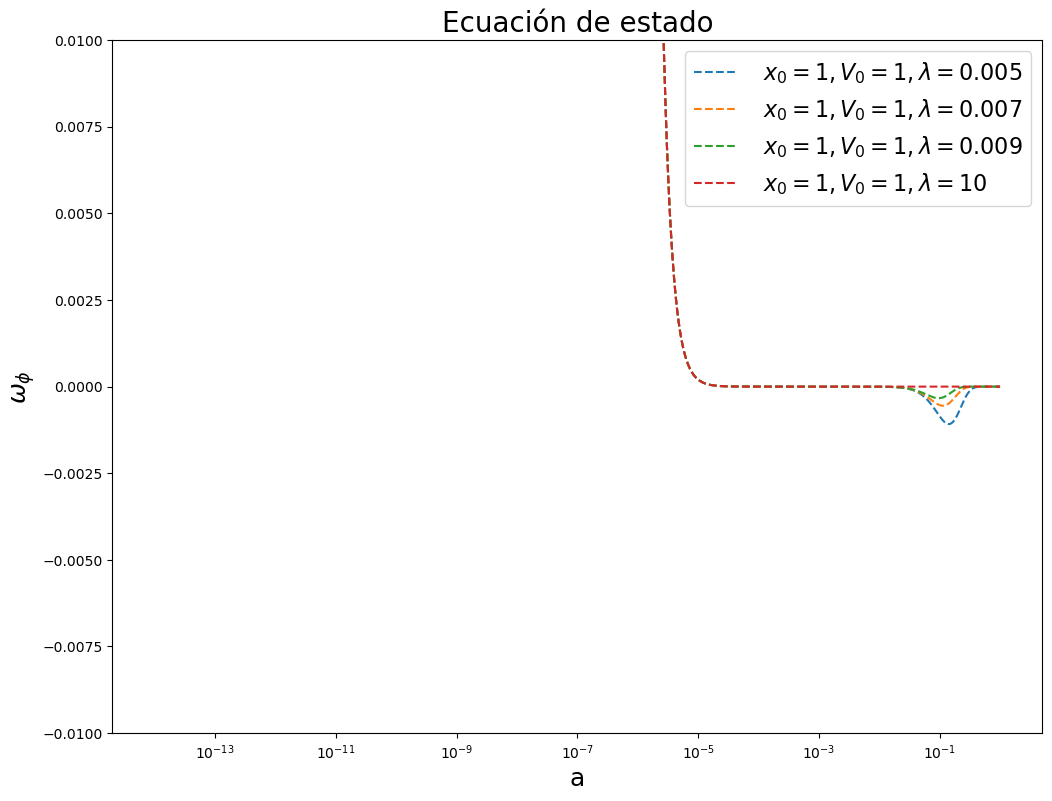

In [31]:
#plt.yscale("log")
plt.figure(figsize=(12, 9))
#plt.xlim(1e-10,1)

plt.xscale("log")
for i, (x, V0, lam) in enumerate(combinations3[:4]):
#plt.plot(a,w_sch0,"--", color="purple",label="$\omega _{\phi}$")
    plt.plot(a_all3[i], w_sch_all3[i],"--",label=f" $x_0 = {x}, V_0 = {V0}, \lambda = {lam}$")


#plt.plot(a,1/3, color="red",label="$\omega _{sch}$")
plt.ylim(-0.01,0.01)

plt.title('Ecuación de estado', fontsize=20)
plt.xlabel('a',fontsize=18)
plt.ylabel('$\omega _{\phi}$',fontsize=18)
plt.legend(fontsize=16)

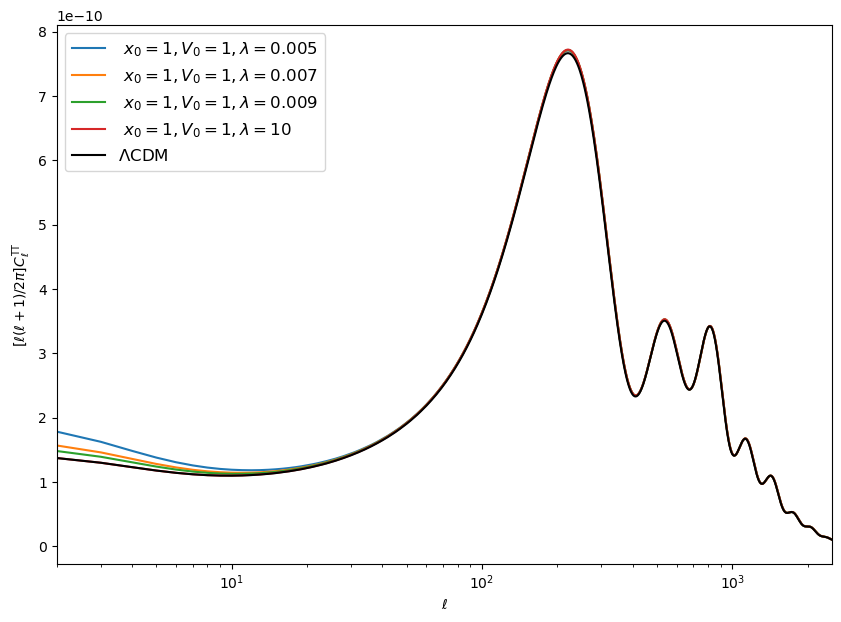

In [32]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x3, V03, lam3) in enumerate(combinations3[:4]):
    plt.plot(ll_all3[i], clTT_all3[i]*ll_all3[i]*(ll_all3[i]+1)/2./pi, label=f" $x_0 = {x3}, V_0 = {V03}, \lambda = {lam3}$")
    
plt.plot(ll_lcdm,clTT_lcdm*ll_lcdm*(ll_lcdm+1)/2./pi, color='black', label = "$\Lambda$CDM ")

plt.legend(fontsize=12)
plt.show()

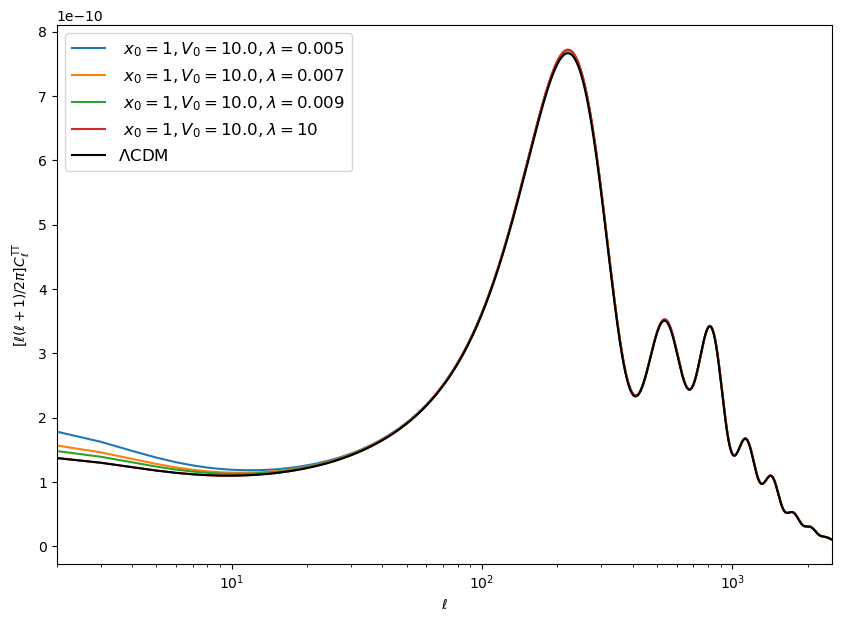

In [33]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x3, V03, lam3) in enumerate(combinations3[4:8]):
    plt.plot(ll_all3[i], clTT_all3[i]*ll_all3[i]*(ll_all3[i]+1)/2./pi, label=f" $x_0 = {x3}, V_0 = {V03}, \lambda = {lam3}$")
    
plt.plot(ll_lcdm,clTT_lcdm*ll_lcdm*(ll_lcdm+1)/2./pi, color='black', label = "$\Lambda$CDM ")

plt.legend(fontsize=12)
plt.show()

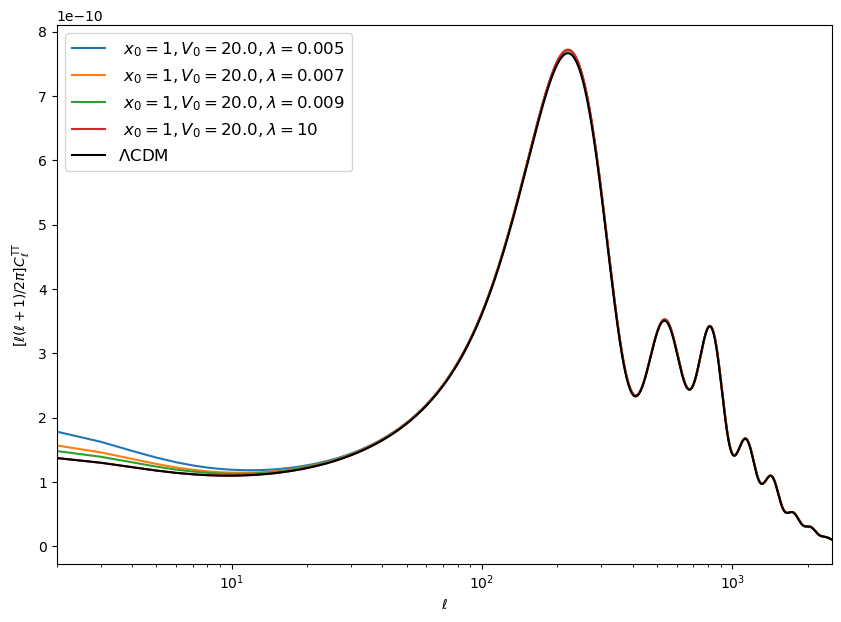

In [34]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x3, V03, lam3) in enumerate(combinations3[8:12]):
    plt.plot(ll_all3[i], clTT_all3[i]*ll_all3[i]*(ll_all3[i]+1)/2./pi, label=f" $x_0 = {x3}, V_0 = {V03}, \lambda = {lam3}$")

plt.plot(ll_lcdm, clTT_lcdm * ll_lcdm * (ll_lcdm + 1)/2./pi, color='black', label = "$\Lambda$CDM ")
    
plt.legend(fontsize=12)
plt.show()

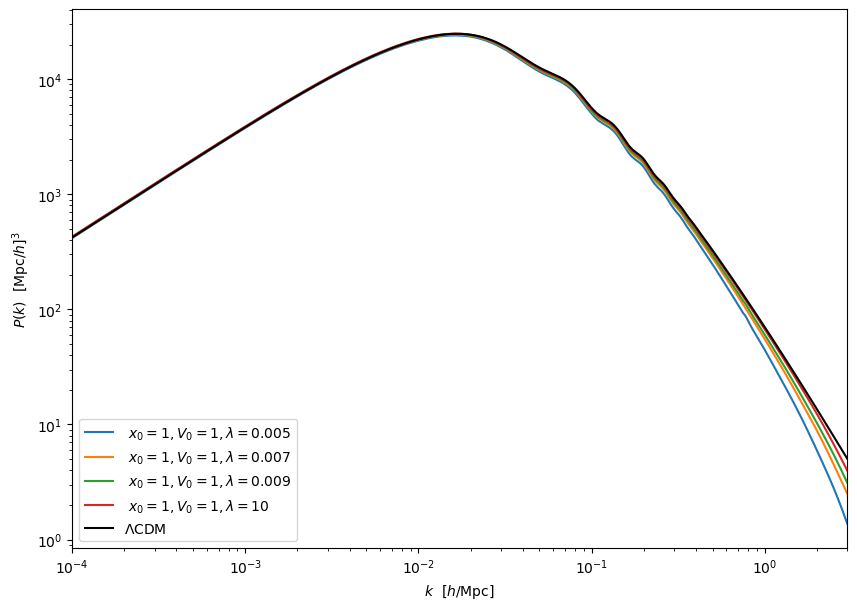

In [35]:
# plot P(k)
plt.figure(figsize=(10, 7))
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x03, V03, lam3) in enumerate(combinations3[:4]):
    plt.plot(kk,Pk_all3[i], label = f" $x_0 = {x03}, V_0 = {V03}, \lambda = {lam3}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

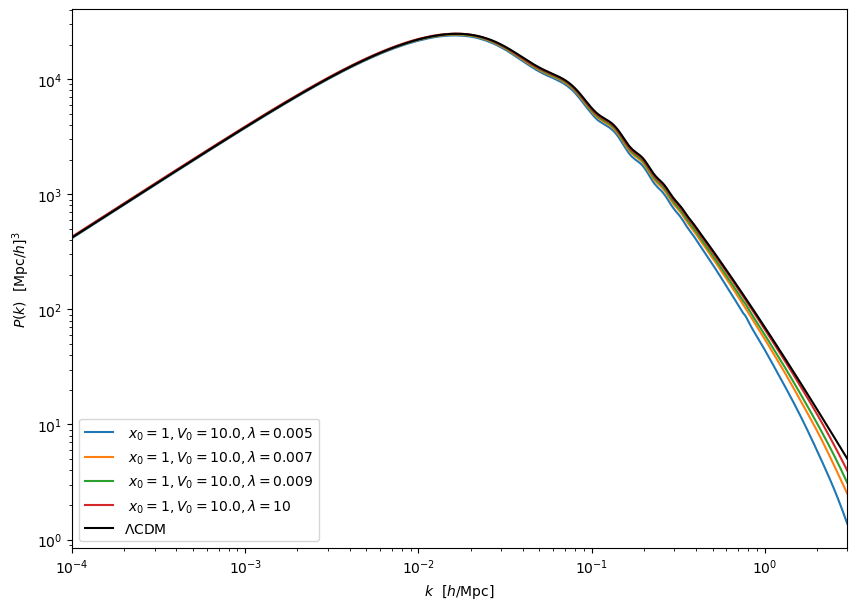

In [36]:
# plot P(k)
plt.figure(figsize=(10, 7))
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x03, V03, lam3) in enumerate(combinations3[4:8]):
    plt.plot(kk,Pk_all3[i], label = f" $x_0 = {x03}, V_0 = {V03}, \lambda = {lam3}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

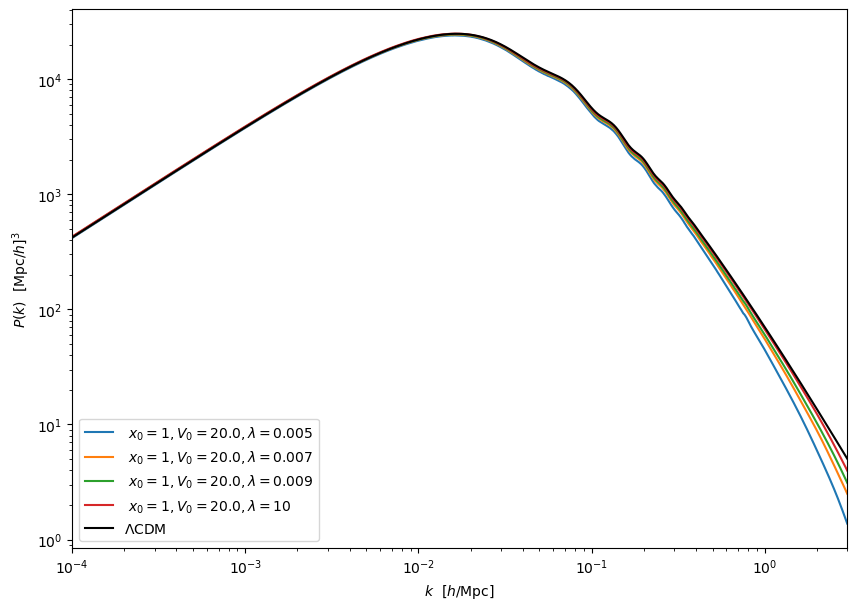

In [37]:
# plot P(k)
plt.figure(figsize=(10, 7))
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x03, V03, lam3) in enumerate(combinations3[8:12]):
    plt.plot(kk,Pk_all3[i], label = f" $x_0 = {x03}, V_0 = {V03}, \lambda = {lam3}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

In [38]:
common_settings4 = {
    'output': 'mPk,tCl,pCl,lCl',
    'P_k_max_1/Mpc': 3.0,
    'k_output_values': str(k_out).strip('[]'),
    'h': 0.6732117,
    'Omega_fld': 0,
    'Omega_smg': -1,
    'Omega_Lambda': 0.69,
    'omega_b': 0.022032,
    'Omega_cdm': 0,
    'gravity_model': 'quintessence_monomial',
    'theta_schm': 2.7e-19,
    'DM_schm': 0.26,
    'h_schm': 1,
    'A_s': 2.100549e-09,
    'n_s': 0.9660499,
    'tau_reio': 0.05430842,
    'compute damping scale': 'yes',
    'lensing':'yes'
}

# Lista de valores para x0_schm, V0_schm y lambda_schm
x_variable4 = [1e1]
V0_variable4 = [1, 1e1, 3e1]
lambda_variable4 = [7e-4, 1e-3, 1e-2,1e-2]  # Lista de valores para lambda_schm

# Generar todas las combinaciones de x0_schm, V0_schm y lambda_schm
combinations4 = list(itertools.product(x_variable4, V0_variable4, lambda_variable4))

# Background
z_all4 = []
a_all4 = []
Omega_rad_all4 = []
Omega_bar_all4 = []
Omega_lambda_all4 = []
Omega_sch_all4 = []
w_sch_all4 = []
rho_rel_all4 = []
integral_all4 = []

# Listas para perturbaciones lineales
clTT_all4 = []
clEE_all4 = []
clPP_all4 = []
Pk_all4 = []
ll_all4 = []

# Ciclo para iterar sobre las combinaciones de x0_schm, V0_schm y lambda_schm
for x4, V04, lam4 in combinations4:
    common_settings4['x0_schm'] = x4        # Actualizar el valor de x0_schm
    common_settings4['V0_schm'] = V04       # Actualizar el valor de V0_schm
    common_settings4['lambda_schm'] = lam4  # Actualizar el valor de lambda_schm
    print(f"iniciando cálculos con la combinación: x0={x4},V0={V04}, lambda={lam4}")
    # Crear una nueva instancia de Class y configurar
    cosmo = Class()
    cosmo.set(common_settings4)
    cosmo.compute()
    
    # Obtener el background
    background = cosmo.get_background()

    # Extraer las cantidades necesarias del background
    z = background['z']                    # Redshift
    a = 1 / (1 + z)                        # Factor de escala
    rho_gamma = background['(.)rho_g']     # Densidad de energía de fotones
    rho_nu = background['(.)rho_ur']       # Densidad de energía de neutrinos relativistas
    rad = rho_gamma + rho_nu               # Radiación total (fotones + neutrinos relativistas)
    bar = background['(.)rho_b']           # Densidad de energía bariónica
    lamb = background['(.)rho_lambda']     # Densidad de energía de la constante cosmológica
    rho_crit = background['(.)rho_crit']   # Densidad crítica
    rho_sch = background['(.)rho_smg']     # Densidad de energía del campo escalar (quintessencia)
    p_sch = background['(.)p_smg']         # Presión del campo escalar
    
    # Calcular las fracciones de densidad
    Omega_rad = rad / rho_crit
    Omega_bar = bar / rho_crit
    Omega_lambda = lamb / rho_crit
    Omega_sch = rho_sch / rho_crit
    
    # Calcular el parámetro de ecuación de estado w_sch
    #w_sch = (p_sch - lamb) / (rho_sch + lamb)
    w_sch = p_sch / rho_sch
    
    # Densidad relativista total
    rho_rel = rad + 3 * p_sch

    # Guardar los resultados en las listas correspondientes
    z_all4.append(z)
    a_all4.append(a)
    Omega_rad_all4.append(Omega_rad)
    Omega_bar_all4.append(Omega_bar)
    Omega_lambda_all4.append(Omega_lambda)
    Omega_sch_all4.append(Omega_sch)
    w_sch_all4.append(w_sch)
    rho_rel_all4.append(rho_rel)
    
    # Obtener los espectros angulares C_l
    cls = cosmo.lensed_cl(2500)  # Espectros angulares lensed hasta l=2500
    ll = cls['ell'][2:]  # Valores de l
    clTT = cls['tt'][2:]  # C_l^TT
    clEE = cls['ee'][2:]  # C_l^EE
    clPP = cls['pp'][2:]  # C_l^PP
    
    # Guardar C_l en las listas correspondientes
    clTT_all4.append(clTT)
    clEE_all4.append(clEE)
    clPP_all4.append(clPP)
    ll_all4.append(ll)

    # Obtener el espectro de potencia P(k)
    kk = np.logspace(-4, np.log10(3), 1000)  # Valores de k en h/Mpc
    Pk = []  # Inicializar lista para P(k)

    h = cosmo.h()  # Obtener h (para conversión de k)
    for k in kk:
        Pk.append(cosmo.pk(k * h, 0.) * h ** 3)  # P(k) en (Mpc/h)^3

    # Guardar los resultados de P(k)
    Pk_all4.append(Pk)
    
    # Limpiar la memoria de CLASS al final de cada ciclo
    cosmo.struct_cleanup()
    print(f"El cálculo se ha completado con la combinación x0={x4},V0={V04}, lambda={lam4}")

# Graficar los resultados

print("cálculos terminados")



iniciando cálculos con la combinación: x0=10.0,V0=1, lambda=0.0007
El cálculo se ha completado con la combinación x0=10.0,V0=1, lambda=0.0007
iniciando cálculos con la combinación: x0=10.0,V0=1, lambda=0.001


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26492
aquí voy y todo bien 2.80821
aquí voy y todo bien 2.03656
aquí voy y todo bien 2.11034
aquí voy y todo bien 2.07345
aquí voy y todo bien 2.10958
aquí voy y todo bien 2.10996
aquí voy y todo bien 2.10958
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26304
aquí voy y todo bien 2.77846
aquí voy y todo bien 2.02075
aquí voy y todo bien 2.09495
aquí voy y todo bien 2.05785
aquí voy y todo bien 2.09419
aquí voy y todo bien 2.07602
aquí voy y todo bien 2.09419
aquí voy y todo bien 1


El cálculo se ha completado con la combinación x0=10.0,V0=1, lambda=0.001
iniciando cálculos con la combinación: x0=10.0,V0=1, lambda=0.01


aquí voy y todo bien 1
aquí voy y todo bien 1.26131
aquí voy y todo bien 2.75156
aquí voy y todo bien 2.00644
aquí voy y todo bien 2.08096
aquí voy y todo bien 2.0437
aquí voy y todo bien 2.08022
aquí voy y todo bien 2.08059
aquí voy y todo bien 2.08022
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26131
aquí voy y todo bien 2.75156
aquí voy y todo bien 2.00644
aquí voy y todo bien 2.08096
aquí voy y todo bien 2.0437
aquí voy y todo bien 2.08022
aquí voy y todo bien 2.08059
aquí voy y todo bien 2.08022


El cálculo se ha completado con la combinación x0=10.0,V0=1, lambda=0.01
iniciando cálculos con la combinación: x0=10.0,V0=1, lambda=0.01
El cálculo se ha completado con la combinación x0=10.0,V0=1, lambda=0.01
iniciando cálculos con la combinación: x0=10.0,V0=10.0, lambda=0.0007


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.29825
aquí voy y todo bien 3.4476
aquí voy y todo bien 2.37292
aquí voy y todo bien 2.42805
aquí voy y todo bien 2.40049
aquí voy y todo bien 2.42724
aquí voy y todo bien 2.41386
aquí voy y todo bien 2.42724


El cálculo se ha completado con la combinación x0=10.0,V0=10.0, lambda=0.0007
iniciando cálculos con la combinación: x0=10.0,V0=10.0, lambda=0.001


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.27895
aquí voy y todo bien 3.04889
aquí voy y todo bien 2.16392
aquí voy y todo bien 2.23292
aquí voy y todo bien 2.19842
aquí voy y todo bien 2.23208
aquí voy y todo bien 2.21525
aquí voy y todo bien 2.23208


El cálculo se ha completado con la combinación x0=10.0,V0=10.0, lambda=0.001
iniciando cálculos con la combinación: x0=10.0,V0=10.0, lambda=0.01
El cálculo se ha completado con la combinación x0=10.0,V0=10.0, lambda=0.01
iniciando cálculos con la combinación: x0=10.0,V0=10.0, lambda=0.01


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26147
aquí voy y todo bien 2.75397
aquí voy y todo bien 2.00772
aquí voy y todo bien 2.08222
aquí voy y todo bien 2.04497
aquí voy y todo bien 2.08148
aquí voy y todo bien 2.06323
aquí voy y todo bien 2.08148
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26147
aquí voy y todo bien 2.75397
aquí voy y todo bien 2.00772
aquí voy y todo bien 2.08222
aquí voy y todo bien 2.04497
aquí voy y todo bien 2.08148
aquí voy y todo bien 2.06323
aquí voy y todo bien 2.08148


El cálculo se ha completado con la combinación x0=10.0,V0=10.0, lambda=0.01
iniciando cálculos con la combinación: x0=10.0,V0=30.0, lambda=0.0007


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.3772
aquí voy y todo bien 6.86997
aquí voy y todo bien 4.12359
aquí voy y todo bien 3.85091
aquí voy y todo bien 3.98725
aquí voy y todo bien 3.85257
aquí voy y todo bien 3.91991
aquí voy y todo bien 3.85257
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.3154
aquí voy y todo bien 3.88401
aquí voy y todo bien 2.5997
aquí voy y todo bien 2.63329
aquí voy y todo bien 2.6165
aquí voy y todo bien 2.63267
aquí voy y todo bien 2.62458
aquí voy y todo bien 2.63267


El cálculo se ha completado con la combinación x0=10.0,V0=30.0, lambda=0.0007
iniciando cálculos con la combinación: x0=10.0,V0=30.0, lambda=0.001
El cálculo se ha completado con la combinación x0=10.0,V0=30.0, lambda=0.001
iniciando cálculos con la combinación: x0=10.0,V0=30.0, lambda=0.01


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26183
aquí voy y todo bien 2.75935
aquí voy y todo bien 2.01059
aquí voy y todo bien 2.08503
aquí voy y todo bien 2.04781
aquí voy y todo bien 2.08428
aquí voy y todo bien 2.08466
aquí voy y todo bien 2.08428


El cálculo se ha completado con la combinación x0=10.0,V0=30.0, lambda=0.01
iniciando cálculos con la combinación: x0=10.0,V0=30.0, lambda=0.01
El cálculo se ha completado con la combinación x0=10.0,V0=30.0, lambda=0.01
cálculos terminados


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26183
aquí voy y todo bien 2.75935
aquí voy y todo bien 2.01059
aquí voy y todo bien 2.08503
aquí voy y todo bien 2.04781
aquí voy y todo bien 2.08428
aquí voy y todo bien 2.08466
aquí voy y todo bien 2.08428


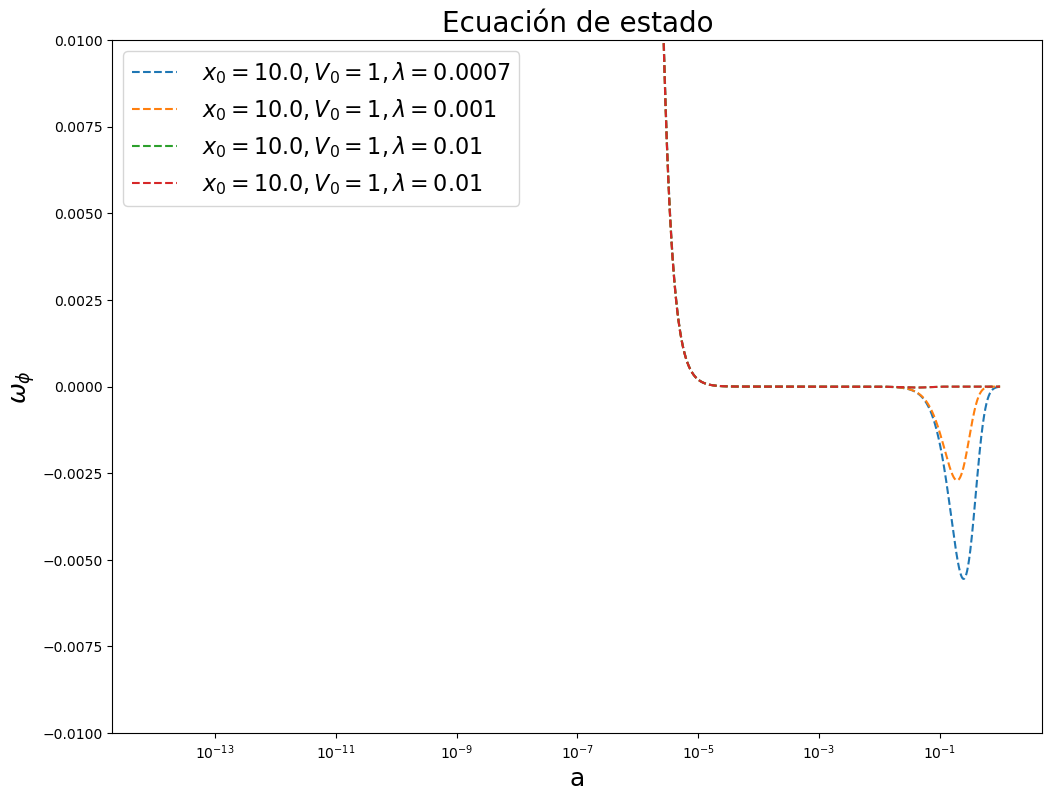

In [39]:
#plt.yscale("log")
plt.figure(figsize=(12, 9))
#plt.xlim(1e-10,1)

plt.xscale("log")
for i, (x, V0, lam) in enumerate(combinations4[:4]):
#plt.plot(a,w_sch0,"--", color="purple",label="$\omega _{\phi}$")
    plt.plot(a_all4[i], w_sch_all4[i],"--",label=f" $x_0 = {x}, V_0 = {V0}, \lambda = {lam}$")


#plt.plot(a,1/3, color="red",label="$\omega _{sch}$")
plt.ylim(-0.01,0.01)

plt.title('Ecuación de estado', fontsize=20)
plt.xlabel('a',fontsize=18)
plt.ylabel('$\omega _{\phi}$',fontsize=18)
plt.legend(fontsize=16)

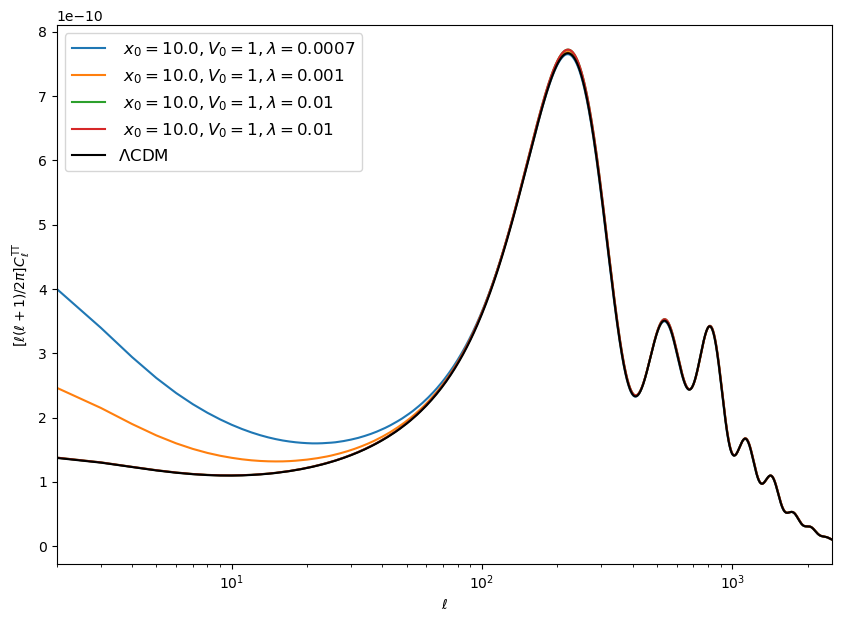

In [40]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x4, V04, lam4) in enumerate(combinations4[:4]):
    plt.plot(ll_all4[i], clTT_all4[i]*ll_all4[i]*(ll_all4[i]+1)/2./pi, label=f" $x_0 = {x4}, V_0 = {V04}, \lambda = {lam4}$")

    
plt.plot(ll_lcdm,clTT_lcdm*ll_lcdm*(ll_lcdm+1)/2./pi, color='black', label = "$\Lambda$CDM ")
    
plt.legend(fontsize=12)
plt.show()

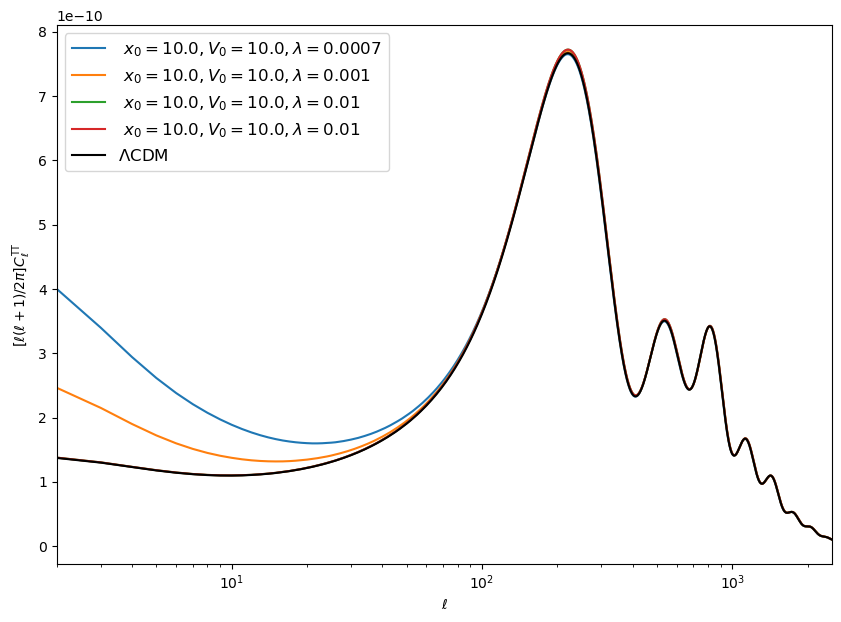

In [41]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x4, V04, lam4) in enumerate(combinations4[4:8]):
    plt.plot(ll_all4[i], clTT_all4[i]*ll_all4[i]*(ll_all4[i]+1)/2./pi, label=f" $x_0 = {x4}, V_0 = {V04}, \lambda = {lam4}$")
plt.plot(ll_lcdm,clTT_lcdm*ll_lcdm*(ll_lcdm+1)/2./pi, color='black', label = "$\Lambda$CDM ")

plt.legend(fontsize=12)
plt.show()

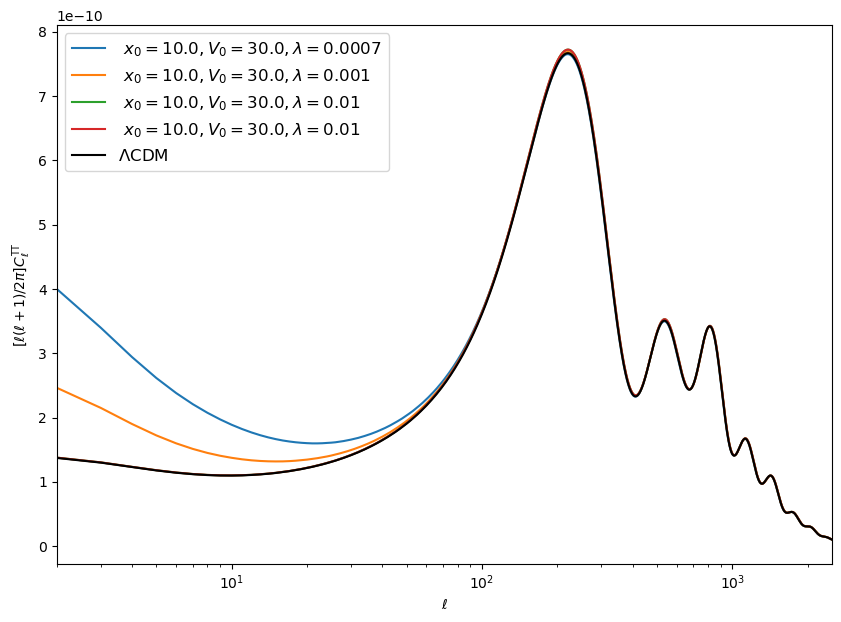

In [42]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x4, V04, lam4) in enumerate(combinations4[8:12]):
    plt.plot(ll_all4[i], clTT_all4[i]*ll_all4[i]*(ll_all4[i]+1)/2./pi, label=f" $x_0 = {x4}, V_0 = {V04}, \lambda = {lam4}$")

plt.plot(ll_lcdm,clTT_lcdm*ll_lcdm*(ll_lcdm+1)/2./pi, color='black', label = "$\Lambda$CDM ")
    
plt.legend(fontsize=12)
plt.show()

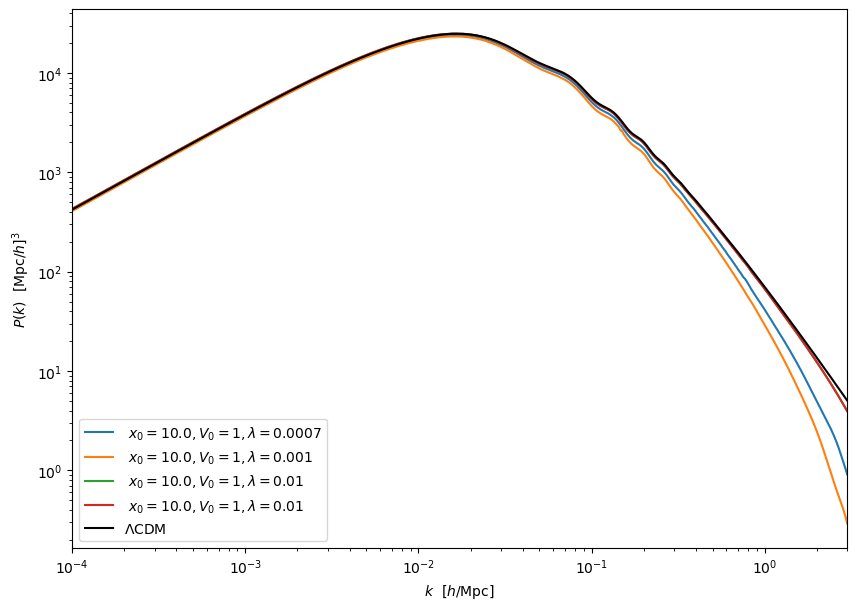

In [43]:
# plot P(k)
plt.figure(figsize=(10, 7))

plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x4, V04, lam4) in enumerate(combinations4[:4]):
    plt.plot(kk,Pk_all4[i], label = f" $x_0 = {x4}, V_0 = {V04}, \lambda = {lam4}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

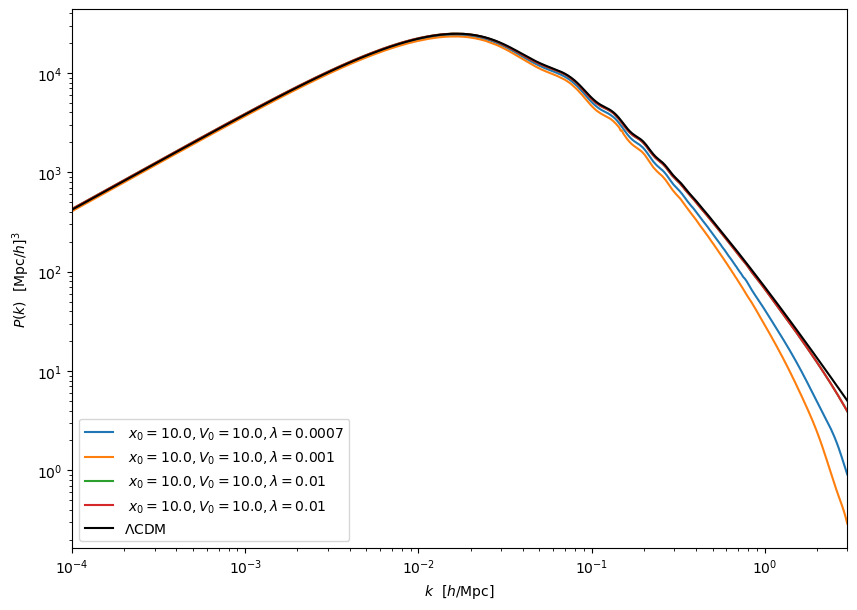

In [44]:
# plot P(k)
plt.figure(figsize=(10, 7))

plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x4, V04, lam4) in enumerate(combinations4[4:8]):
    plt.plot(kk,Pk_all4[i], label = f" $x_0 = {x4}, V_0 = {V04}, \lambda = {lam4}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

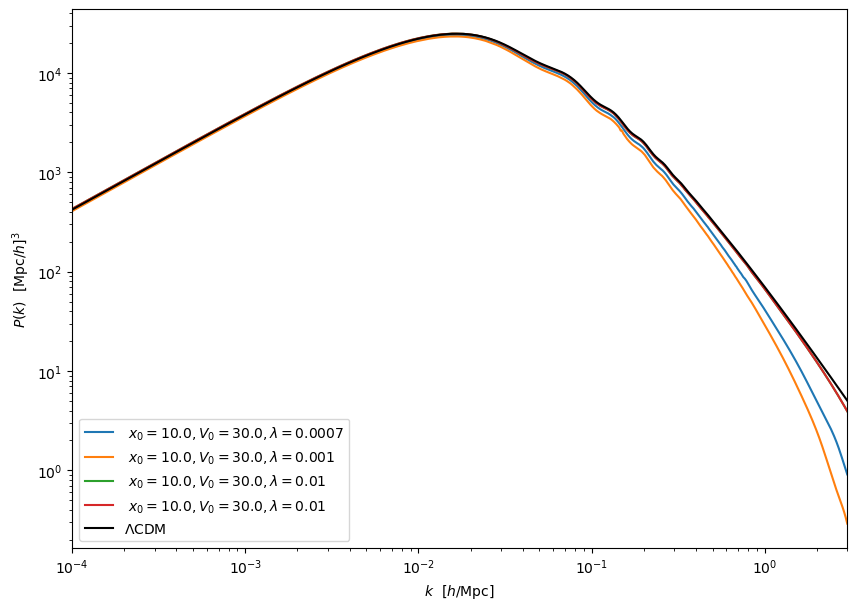

In [45]:
# plot P(k)
plt.figure(figsize=(10, 7))

plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x4, V04, lam4) in enumerate(combinations4[8:12]):
    plt.plot(kk,Pk_all4[i], label = f" $x_0 = {x4}, V_0 = {V04}, \lambda = {lam4}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

In [46]:
common_settings5 = {
    'output': 'mPk,tCl,pCl,lCl',
    'P_k_max_1/Mpc': 3.0,
    'k_output_values': str(k_out).strip('[]'),
    'h': 0.6732117,
    'Omega_fld': 0,
    'Omega_smg': -1,
    'Omega_Lambda': 0.70,
    'omega_b': 0.022032,
    'Omega_cdm': 0,
    'gravity_model': 'quintessence_monomial',
    'theta_schm': 2.7e-19,
    'DM_schm': 0.26,
    'h_schm': 1,
    'A_s': 2.100549e-09,
    'n_s': 0.9660499,
    'tau_reio': 0.05430842,
    'compute damping scale': 'yes',
    'lensing':'yes'
}

# Lista de valores para x0_schm, V0_schm y lambda_schm
x_variable5 = [1e2]
V0_variable5 = [1, 1e1, 4e1]
lambda_variable5 = [7e-4, 1e-3, 1e-2,10]  # Lista de valores para lambda_schm

# Generar todas las combinaciones de x0_schm, V0_schm y lambda_schm
combinations5 = list(itertools.product(x_variable5, V0_variable5, lambda_variable5))

# Background
z_all5 = []
a_all5 = []
Omega_rad_all5 = []
Omega_bar_all5 = []
Omega_lambda_all5 = []
Omega_sch_all5 = []
w_sch_all5 = []
rho_rel_all5 = []
integral_all5 = []

# Listas para perturbaciones lineales
clTT_all5 = []
clEE_all5 = []
clPP_all5 = []
Pk_all5 = []
ll_all5 = []

# Ciclo para iterar sobre las combinaciones de x0_schm, V0_schm y lambda_schm
for x5, V05, lam5 in combinations5:
    common_settings5['x0_schm'] = x5        # Actualizar el valor de x0_schm
    common_settings5['V0_schm'] = V05       # Actualizar el valor de V0_schm
    common_settings5['lambda_schm'] = lam5  # Actualizar el valor de lambda_schm
    print(f"iniciando cálculos con la combinación: x0={x5},V0={V05}, lambda={lam5}")
    # Crear una nueva instancia de Class y configurar
    cosmo = Class()
    cosmo.set(common_settings5)
    cosmo.compute()
    
    # Obtener el background
    background = cosmo.get_background()

    # Extraer las cantidades necesarias del background
    z = background['z']                    # Redshift
    a = 1 / (1 + z)                        # Factor de escala
    rho_gamma = background['(.)rho_g']     # Densidad de energía de fotones
    rho_nu = background['(.)rho_ur']       # Densidad de energía de neutrinos relativistas
    rad = rho_gamma + rho_nu               # Radiación total (fotones + neutrinos relativistas)
    bar = background['(.)rho_b']           # Densidad de energía bariónica
    lamb = background['(.)rho_lambda']     # Densidad de energía de la constante cosmológica
    rho_crit = background['(.)rho_crit']   # Densidad crítica
    rho_sch = background['(.)rho_smg']     # Densidad de energía del campo escalar (quintessencia)
    p_sch = background['(.)p_smg']         # Presión del campo escalar
    
    # Calcular las fracciones de densidad
    Omega_rad = rad / rho_crit
    Omega_bar = bar / rho_crit
    Omega_lambda = lamb / rho_crit
    Omega_sch = rho_sch / rho_crit
    
    # Calcular el parámetro de ecuación de estado w_sch
    #w_sch = (p_sch - lamb) / (rho_sch + lamb)
    w_sch = p_sch / rho_sch
    
    # Densidad relativista total
    rho_rel = rad + 3 * p_sch

    # Guardar los resultados en las listas correspondientes
    z_all5.append(z)
    a_all5.append(a)
    Omega_rad_all5.append(Omega_rad)
    Omega_bar_all5.append(Omega_bar)
    Omega_lambda_all5.append(Omega_lambda)
    Omega_sch_all5.append(Omega_sch)
    w_sch_all5.append(w_sch)
    rho_rel_all5.append(rho_rel)
    
    # Obtener los espectros angulares C_l
    cls = cosmo.lensed_cl(2500)  # Espectros angulares lensed hasta l=2500
    ll = cls['ell'][2:]  # Valores de l
    clTT = cls['tt'][2:]  # C_l^TT
    clEE = cls['ee'][2:]  # C_l^EE
    clPP = cls['pp'][2:]  # C_l^PP
    
    # Guardar C_l en las listas correspondientes
    clTT_all5.append(clTT)
    clEE_all5.append(clEE)
    clPP_all5.append(clPP)
    ll_all5.append(ll)

    # Obtener el espectro de potencia P(k)
    kk = np.logspace(-4, np.log10(3), 1000)  # Valores de k en h/Mpc
    Pk = []  # Inicializar lista para P(k)

    h = cosmo.h()  # Obtener h (para conversión de k)
    for k in kk:
        Pk.append(cosmo.pk(k * h, 0.) * h ** 3)  # P(k) en (Mpc/h)^3

    # Guardar los resultados de P(k)
    Pk_all5.append(Pk)
    
    # Limpiar la memoria de CLASS al final de cada ciclo
    cosmo.struct_cleanup()
    print(f"El cálculo se ha completado con la combinación x0={x5},V0={V05}, lambda={lam5}")

# Graficar los resultados

print("cálculos terminados")



iniciando cálculos con la combinación: x0=100.0,V0=1, lambda=0.0007
El cálculo se ha completado con la combinación x0=100.0,V0=1, lambda=0.0007
iniciando cálculos con la combinación: x0=100.0,V0=1, lambda=0.001


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.25164
aquí voy y todo bien 2.7659
aquí voy y todo bien 2.00877
aquí voy y todo bien 2.0837
aquí voy y todo bien 2.04624
aquí voy y todo bien 2.08293
aquí voy y todo bien 2.06459
aquí voy y todo bien 2.08293
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.25147
aquí voy y todo bien 2.76309
aquí voy y todo bien 2.00728
aquí voy y todo bien 2.08225
aquí voy y todo bien 2.04476
aquí voy y todo bien 2.08148
aquí voy y todo bien 2.06312
aquí voy y todo bien 2.08148


El cálculo se ha completado con la combinación x0=100.0,V0=1, lambda=0.001
iniciando cálculos con la combinación: x0=100.0,V0=1, lambda=0.01
El cálculo se ha completado con la combinación x0=100.0,V0=1, lambda=0.01
iniciando cálculos con la combinación: x0=100.0,V0=1, lambda=10


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.2513
aquí voy y todo bien 2.76043
aquí voy y todo bien 2.00586
aquí voy y todo bien 2.08086
aquí voy y todo bien 2.04336
aquí voy y todo bien 2.0801
aquí voy y todo bien 2.08048
aquí voy y todo bien 2.0801
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.2513
aquí voy y todo bien 2.7604
aquí voy y todo bien 2.00585
aquí voy y todo bien 2.08085
aquí voy y todo bien 2.04335
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.06171
aquí voy y todo bien 2.08008


El cálculo se ha completado con la combinación x0=100.0,V0=1, lambda=10
iniciando cálculos con la combinación: x0=100.0,V0=10.0, lambda=0.0007
Root has been bracketed after 2 iterations: [1.26304, 2.77846].
Root has been bracketed after 2 iterations: [1.26207, 2.76321].
Root has been bracketed after 2 iterations: [1.2619, 2.76055].
Root has been bracketed after 2 iterations: [1.26129, 2.75129].
Root has been bracketed after 2 iterations: [1.27895, 3.04889].
Root has been bracketed after 2 iterations: [1.26905, 2.87517].
Root has been bracketed after 2 iterations: [1.26733, 2.84668].
Root has been bracketed after 2 iterations: [1.26129, 2.75129].
Root has been bracketed after 2 iterations: [1.28791, 3.22268].
Root has been bracketed after 2 iterations: [1.27296, 2.9413].
Root has been bracketed after 2 iterations: [1.27036, 2.89685].
Root has been bracketed after 2 iterations: [1.26129, 2.75129].
Root has been bracketed after 2 iterations: [1.26199, 2.76201].
Root has been bracketed aft

aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.25476
aquí voy y todo bien 2.81639
aquí voy y todo bien 2.03558
aquí voy y todo bien 2.10981
aquí voy y todo bien 2.07269
aquí voy y todo bien 2.10902
aquí voy y todo bien 2.09086
aquí voy y todo bien 2.10902
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.253
aquí voy y todo bien 2.78756
aquí voy y todo bien 2.02028
aquí voy y todo bien 2.09493
aquí voy y todo bien 2.0576
aquí voy y todo bien 2.09415
aquí voy y todo bien 2.09454
aquí voy y todo bien 2.09415


El cálculo se ha completado con la combinación x0=100.0,V0=10.0, lambda=0.001
iniciando cálculos con la combinación: x0=100.0,V0=10.0, lambda=0.01
El cálculo se ha completado con la combinación x0=100.0,V0=10.0, lambda=0.01
iniciando cálculos con la combinación: x0=100.0,V0=10.0, lambda=10


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.25131
aquí voy y todo bien 2.76068
aquí voy y todo bien 2.00599
aquí voy y todo bien 2.08099
aquí voy y todo bien 2.04349
aquí voy y todo bien 2.08022
aquí voy y todo bien 2.08061
aquí voy y todo bien 2.08022
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.2513
aquí voy y todo bien 2.7604
aquí voy y todo bien 2.00585
aquí voy y todo bien 2.08085
aquí voy y todo bien 2.04335
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.06171
aquí voy y todo bien 2.08008


El cálculo se ha completado con la combinación x0=100.0,V0=10.0, lambda=10
iniciando cálculos con la combinación: x0=100.0,V0=40.0, lambda=0.0007


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.26527
aquí voy y todo bien 2.99843
aquí voy y todo bien 2.13185
aquí voy y todo bien 2.20257
aquí voy y todo bien 2.16721
aquí voy y todo bien 2.20172
aquí voy y todo bien 2.20215
aquí voy y todo bien 2.20172


El cálculo se ha completado con la combinación x0=100.0,V0=40.0, lambda=0.0007
iniciando cálculos con la combinación: x0=100.0,V0=40.0, lambda=0.001


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.25813
aquí voy y todo bien 2.87223
aquí voy y todo bien 2.06518
aquí voy y todo bien 2.13851
aquí voy y todo bien 2.10185
aquí voy y todo bien 2.1377
aquí voy y todo bien 2.13811
aquí voy y todo bien 2.1377


El cálculo se ha completado con la combinación x0=100.0,V0=40.0, lambda=0.001
iniciando cálculos con la combinación: x0=100.0,V0=40.0, lambda=0.01


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.25137
aquí voy y todo bien 2.7615
aquí voy y todo bien 2.00644
aquí voy y todo bien 2.08142
aquí voy y todo bien 2.04393
aquí voy y todo bien 2.08066
aquí voy y todo bien 2.08104
aquí voy y todo bien 2.08066


El cálculo se ha completado con la combinación x0=100.0,V0=40.0, lambda=0.01
iniciando cálculos con la combinación: x0=100.0,V0=40.0, lambda=10
El cálculo se ha completado con la combinación x0=100.0,V0=40.0, lambda=10
cálculos terminados


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.2513
aquí voy y todo bien 2.7604
aquí voy y todo bien 2.00585
aquí voy y todo bien 2.08085
aquí voy y todo bien 2.04335
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.06171
aquí voy y todo bien 2.08008


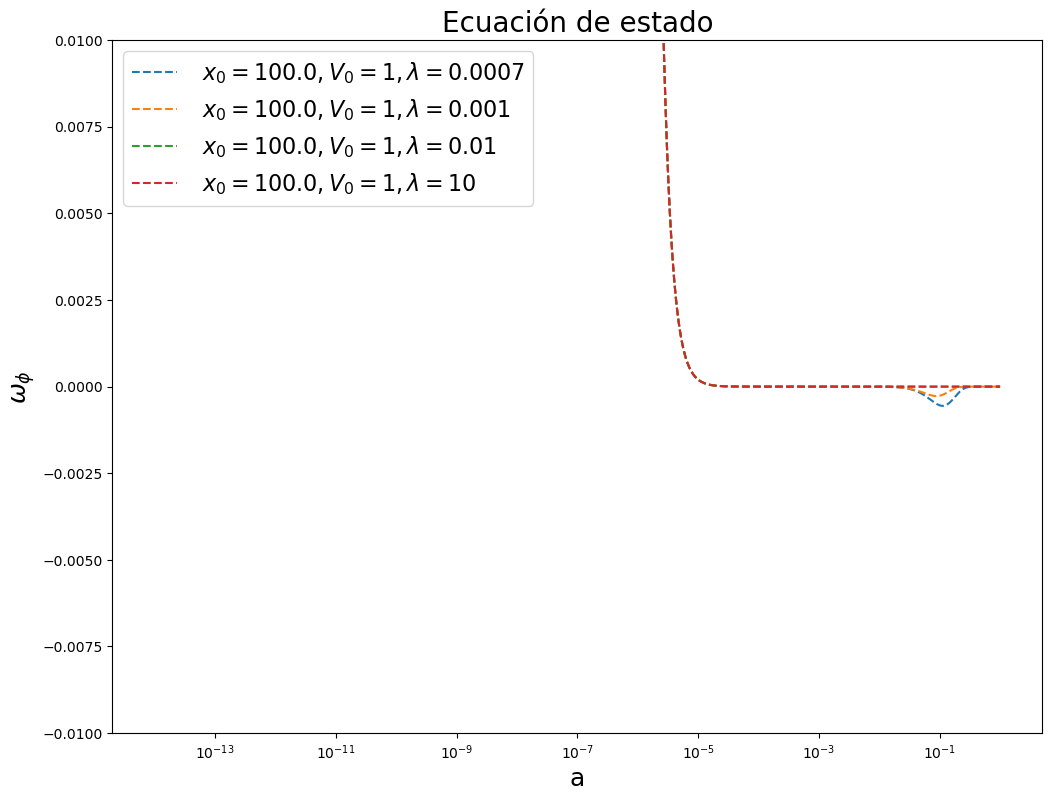

In [47]:
#plt.yscale("log")
plt.figure(figsize=(12, 9))
#plt.xlim(1e-10,1)

plt.xscale("log")
for i, (x, V0, lam) in enumerate(combinations5[:4]):
#plt.plot(a,w_sch0,"--", color="purple",label="$\omega _{\phi}$")
    plt.plot(a_all5[i], w_sch_all5[i],"--",label=f" $x_0 = {x}, V_0 = {V0}, \lambda = {lam}$")


#plt.plot(a,1/3, color="red",label="$\omega _{sch}$")
plt.ylim(-0.01,0.01)

plt.title('Ecuación de estado', fontsize=20)
plt.xlabel('a',fontsize=18)
plt.ylabel('$\omega _{\phi}$',fontsize=18)
plt.legend(fontsize=16)

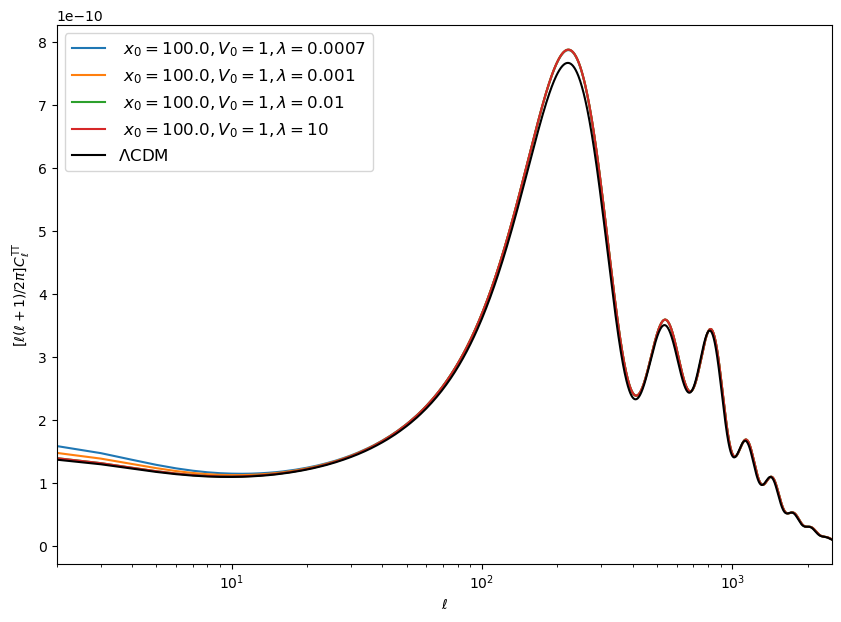

In [48]:

plt.figure(figsize=(10, 7))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x4, V04, lam4) in enumerate(combinations5[:4]):
    plt.plot(ll_all5[i], clTT_all5[i]*ll_all5[i]*(ll_all5[i]+1)/2./pi, label=f" $x_0 = {x4}, V_0 = {V04}, \lambda = {lam4}$")

    
plt.plot(ll_lcdm,clTT_lcdm*ll_lcdm*(ll_lcdm+1)/2./pi, color='black', label = "$\Lambda$CDM ")
    
plt.legend(fontsize=12)
plt.show()

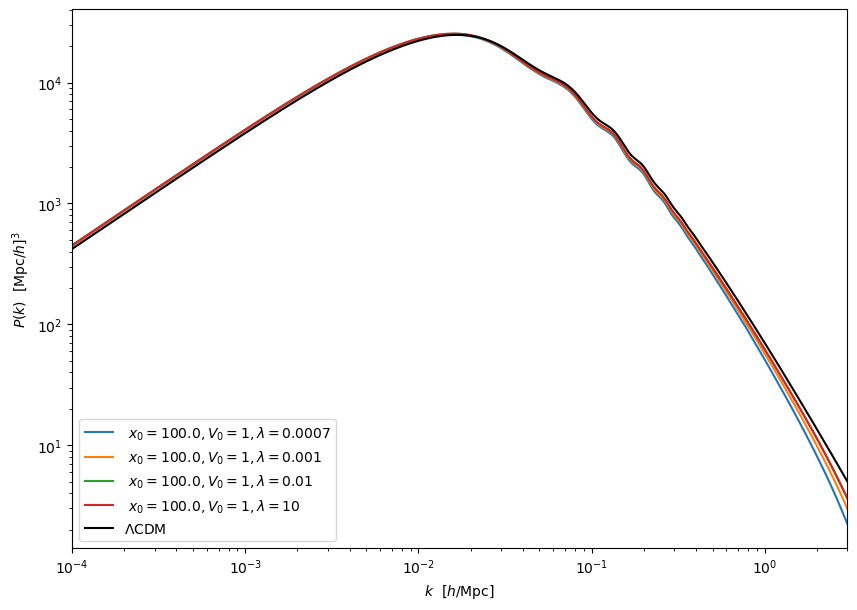

In [49]:
# plot P(k)
plt.figure(figsize=(10, 7))

plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i, (x4, V04, lam4) in enumerate(combinations5[:4]):
    plt.plot(kk,Pk_all5[i], label = f" $x_0 = {x4}, V_0 = {V04}, \lambda = {lam4}$")
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

#plt.legend(fontsize=12)
plt.figure(figsize=(12, 9))
# Graficar C_l^TT
#plt.figure(2)
plt.xscale('log')
plt.yscale('linear')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i, (x, V0, lam) in enumerate(combinations):
    plt.plot(ll_all[i], clTT_all[i]*ll_all[i]*(ll_all[i]+1)/2./pi, label=f" $x_0 = {x}, V_0 = {V0}, \lambda = {lam}$")
plt.legend(fontsize=5)
plt.show()